In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import sklearn.linear_model as lm
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale 
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
QBtrain = pd.read_csv('TrainingBig/QBtrain.csv')
QBtrain.columns

Index(['Unnamed: 0', 'Name', 'CompletionsGame', 'AttemptsGame',
       'PassingCompletionPercentage', 'YardsGame', 'PassingYardsPerAttempt',
       'PassingTouchdownsGame', 'InterceptionsGame', 'PassingRating',
       'RushingAttemptsGame', 'RushingYardsGame', 'RushingYardsPerAttempt',
       'RushingTouchdownsGame', 'PointsGame', 'Score', 'RZCompletionsGame',
       'RZAttemptsGame', 'RZPassingCompletionPercentage', 'RZYardsGame',
       'RZPassingYardsPerAttempt', 'RZPassingTouchdownsGame',
       'RZInterceptionsGame', 'RZPassingRating', 'RZRushingAttemptsGame',
       'RZRushingYardsGame', 'RZRushingYardsPerAttempt',
       'RZRushingTouchdownsGame', 'RZPointsGame', 'SnapsPlayedPercentage',
       'RushSnapPercentage', 'TargetSnapPercentage', 'TouchSnapPercentage',
       'IntendedTouchSnapPercentage', 'DPointsAllowed', 'Home', 'PointSpread',
       'OverUnder', 'total', 'PointsPerGame', 'OffensivePlays',
       'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns',
       'Third

In [3]:
QBtrain = QBtrain.drop('Unnamed: 0', axis=1)

In [4]:
QBtrain.describe()

,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,RushingYardsGame,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
count,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,...,1850.000000,1850.00000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000
mean,19.434292,30.460106,59.862013,222.166737,6.913567,1.380594,0.709560,85.429649,2.780342,11.490161,...,55.696162,6.21227,14.931622,101.543784,63.233568,239.112543,6.800270,10.748000,1.586594,88.450270
std,7.525504,11.159828,16.571872,88.186978,2.227488,0.798133,0.524650,26.371961,1.951279,12.168119,...,8.854357,1.32110,2.276669,126.332168,3.444674,24.303154,0.604011,0.750366,0.369000,9.237856
min,0.000000,0.000000,0.000000,-0.666667,-0.700000,0.000000,0.000000,0.000000,0.000000,-8.000000,...,34.800000,3.00000,9.800000,30.687500,55.400000,169.875000,5.300000,9.200000,0.812500,66.000000
25%,17.600000,29.000000,59.412500,192.767857,6.500000,1.000000,0.333333,78.887500,1.416667,2.087500,...,50.000000,5.40000,13.300000,34.062500,60.600000,225.000000,6.400000,10.200000,1.312500,82.000000
50%,21.400000,33.285714,63.650000,244.333333,7.285714,1.400000,0.666667,90.592000,2.333333,7.612500,...,55.300000,6.20000,14.500000,35.687500,63.200000,237.875000,6.800000,10.700000,1.562500,88.000000
75%,24.111111,37.097727,67.200000,275.291667,7.925000,2.000000,1.000000,99.879545,3.750000,17.395833,...,60.000000,7.10000,16.400000,39.875000,64.900000,252.375000,7.200000,11.200000,1.875000,94.000000
max,39.000000,53.000000,100.000000,439.000000,22.000000,5.000000,4.000000,158.330000,14.000000,104.000000,...,88.900000,10.10000,22.300000,468.000000,74.700000,313.333333,8.900000,13.600000,2.812500,123.000000


In [5]:
QBtrain.head()

,Name,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
0,Joe Flacco,25.666667,41.166667,61.633333,267.500000,6.300000,1.333333,1.166667,77.760000,1.166667,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79
1,Jay Cutler,18.000000,36.000000,50.000000,225.000000,6.200000,1.000000,1.000000,67.480000,4.000000,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79
2,Andy Dalton,21.777778,32.888889,66.600000,269.222222,8.488889,2.000000,0.555556,107.934444,4.777778,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79
3,Josh McCown,24.500000,36.666667,66.783333,281.000000,7.450000,1.333333,0.500000,93.173333,2.166667,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79
4,Matthew Stafford,26.500000,40.750000,65.300000,254.250000,6.425000,1.250000,1.250000,80.237500,1.500000,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79


In [6]:
QBtrain.columns

Index(['Name', 'CompletionsGame', 'AttemptsGame',
       'PassingCompletionPercentage', 'YardsGame', 'PassingYardsPerAttempt',
       'PassingTouchdownsGame', 'InterceptionsGame', 'PassingRating',
       'RushingAttemptsGame', 'RushingYardsGame', 'RushingYardsPerAttempt',
       'RushingTouchdownsGame', 'PointsGame', 'Score', 'RZCompletionsGame',
       'RZAttemptsGame', 'RZPassingCompletionPercentage', 'RZYardsGame',
       'RZPassingYardsPerAttempt', 'RZPassingTouchdownsGame',
       'RZInterceptionsGame', 'RZPassingRating', 'RZRushingAttemptsGame',
       'RZRushingYardsGame', 'RZRushingYardsPerAttempt',
       'RZRushingTouchdownsGame', 'RZPointsGame', 'SnapsPlayedPercentage',
       'RushSnapPercentage', 'TargetSnapPercentage', 'TouchSnapPercentage',
       'IntendedTouchSnapPercentage', 'DPointsAllowed', 'Home', 'PointSpread',
       'OverUnder', 'total', 'PointsPerGame', 'OffensivePlays',
       'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns',
       'ThirdDownAttempts',

In [7]:
X_train = QBtrain.drop(['Score', 'Name'], axis=1).astype('float64')
y_train = QBtrain.Score

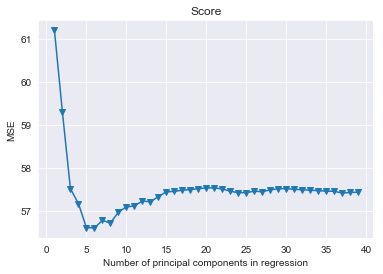

In [8]:
n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = KFold(n_splits=10, shuffle=False, random_state=1)

mse = []

for i in np.arange(1, 40):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.arange(1, 40), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Score')
plt.xlim(xmin=-1);

In [9]:
Offense = pd.read_csv('Input/Offense/Offense.csv')
Offense = Offense.set_index('Team')
Offense.head()


,PointsPerGame,Score,OffensivePlays,OffensiveYards,OffensiveYardsPerPlay,FirstDowns,ThirdDownAttempts,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,...,OpponentTacklesForLossPercentage,TimesSackedPercentage,OpponentQuarterbackHitsPercentage,PassingAttempts,CompletionPercentage,PassingYards,TeamPassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PasserRating
Team,,,,,,,,,,,,,,,,,,,,,
SF,21.2,255,767,4359,5.7,263,145,38.6,38,44.7,...,27.3,8.7,21.3,351,61.5,2423,6.9,11.2,18,83
CHI,28.7,344,766,4219,5.5,258,149,39.6,41,65.9,...,20.6,6.6,12.9,359,66.3,2576,7.2,10.8,22,97
CIN,23.8,286,709,3978,5.6,243,135,38.5,33,75.8,...,26.6,5.6,11.2,402,61.9,2636,6.6,10.6,22,88
BUF,14.8,178,754,3428,4.5,202,166,30.7,25,60.0,...,24.4,8.9,19.3,336,55.1,1758,5.2,9.5,6,56
DEN,23.0,276,738,4388,5.9,238,150,34.7,36,55.6,...,17.5,6.3,16.6,392,62.8,2655,6.8,10.8,14,84


In [10]:
Offense['Played'] = Offense['Score'] / Offense['PointsPerGame']

In [11]:
Offense['OffensivePlays'] = Offense['OffensivePlays'] / Offense['Played']
Offense['OffensiveYards'] = Offense['OffensiveYards'] / Offense['Played']
Offense['FirstDowns'] = Offense['FirstDowns'] / Offense['Played']
Offense['ThirdDownAttempts'] = Offense['ThirdDownAttempts'] / Offense['Played']
Offense['RedZoneAttempts'] = Offense['RedZoneAttempts'] / Offense['Played']
Offense['PassingAttempts'] = Offense['PassingAttempts'] / Offense['Played']
Offense['PassingYards'] = Offense['PassingYards'] / Offense['Played']
Offense['PassingTouchdowns'] = Offense['PassingTouchdowns'] / Offense['Played']

In [12]:
QBOffense = Offense[['PointsPerGame', 'OffensivePlays', 'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns', \
                    'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneAttempts', 'RedZonePercentage', \
                    'TimesSackedPercentage', 'OpponentQuarterbackHitsPercentage']]

In [13]:
RBOffense = Offense[['PointsPerGame', 'OffensivePlays', 'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns', \
                    'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneAttempts', 'RedZonePercentage', \
                    'OpponentTacklesForLossPercentage']]

In [14]:
WROffense = Offense[['PointsPerGame', 'OffensivePlays', 'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns', \
                    'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneAttempts', 'RedZonePercentage', \
                    'PassingAttempts', 'CompletionPercentage', 'PassingYards', 'TeamPassingYardsPerAttempt', \
                    'PassingYardsPerCompletion', 'PassingTouchdowns', 'PasserRating']]

In [15]:
Def = pd.read_csv('Input/Defense/Def.csv')
Def['Opponent'] = Def['Team']
Def = Def.drop('Team', axis=1)
Def = Def.set_index('Opponent')
Def.head()

,OpponentPointsPerGame,OpponentScore,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,OpponentRedZoneAttempts,OpponentRedZonePercentage,...,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating,OpponentRushingTouchdowns
Opponent,,,,,,,,,,,,,,,,,,,,,
SF,28.0,336,752,4185,5.6,249,155,39.4,46,60.9,...,6.6,16.1,411,62.0,2887,7.0,11.3,27,103,9
CHI,20.1,241,771,3815,4.9,218,168,35.1,30,60.0,...,7.5,14.6,457,63.2,2785,6.1,9.6,21,76,4
CIN,30.9,371,837,5197,6.2,301,169,53.8,46,69.6,...,5.7,14.3,434,66.8,3357,7.7,11.6,26,99,16
BUF,24.4,293,726,3530,4.9,227,153,37.3,38,71.1,...,7.5,18.2,381,63.8,2246,5.9,9.2,18,84,12
DEN,21.8,262,783,4595,5.9,240,162,39.5,35,57.1,...,7.8,16.5,435,64.8,3130,7.2,11.1,21,90,8


In [16]:
Def['Played'] = Def['OpponentScore'] / Def['OpponentPointsPerGame']

In [17]:
Def['OpponentOffensivePlays'] = Def['OpponentOffensivePlays'] / Def['Played']
Def['OpponentOffensiveYards'] = Def['OpponentOffensiveYards'] / Def['Played']
Def['OpponentFirstDowns'] = Def['OpponentFirstDowns'] / Def['Played']
Def['OpponentThirdDownAttempts'] = Def['OpponentThirdDownAttempts'] / Def['Played']
Def['OpponentRedZoneAttempts'] = Def['OpponentRedZoneAttempts'] / Def['Played']
Def['OpponentRushingYards'] = Def['OpponentRushingYards'] / Def['Played']
Def['OpponentPassingYards'] = Def['OpponentPassingYards'] / Def['Played']
Def['OpponentPassingTouchdowns'] = Def['OpponentPassingTouchdowns'] / Def['Played']
Def['OpponentRushingTouchdowns'] = Def['OpponentRushingTouchdowns'] / Def['Played']

In [18]:
QBDefense = Def[['OpponentPointsPerGame', 'OpponentOffensivePlays', 'OpponentOffensiveYards', \
             'OpponentOffensiveYardsPerPlay', 'OpponentFirstDowns', 'OpponentThirdDownAttempts', \
            'OpponentThirdDownPercentage', 'OpponentRedZoneAttempts', 'OpponentRedZonePercentage', \
            'OpponentTimesSackedPercentage', 'QuarterbackHitsPercentage', 'OpponentPassingAttempts', \
            'OpponentCompletionPercentage', 'OpponentPassingYards', 'OpponentPassingYardsPerAttempt', \
            'OpponentPassingYardsPerCompletion', 'OpponentPassingTouchdowns', 'OpponentPasserRating']]

In [19]:
RBDefense = Def[['OpponentPointsPerGame', 'OpponentOffensivePlays', 'OpponentOffensiveYards', \
             'OpponentOffensiveYardsPerPlay', 'OpponentFirstDowns', 'OpponentThirdDownAttempts', \
            'OpponentThirdDownPercentage', 'OpponentRedZoneAttempts', 'OpponentRedZonePercentage', \
            'OpponentRushingYards', 'OpponentRushingYardsPerAttempt', 'TacklesForLossPercentage', 'OpponentRushingTouchdowns']]

In [20]:
QB = pd.read_csv('Input/Aggregate/QBAggregate.csv')
QBavg = pd.DataFrame()

QBavg['Name'] = QB['Name']
QBavg['Team'] = QB['Team']
QBavg['Rank'] = QB['Rank']
QBavg['CompletionsGame'] = QB['PassingCompletions'] / QB['Played']
QBavg['AttemptsGame'] = QB['PassingAttempts'] / QB['Played']
QBavg['PassingCompletionPercentage'] = QB['PassingCompletionPercentage']
QBavg['YardsGame'] = QB['PassingYards'] / QB['Played']
QBavg['PassingYardsPerAttempt'] = QB['PassingYardsPerAttempt']
QBavg['PassingTouchdownsGame'] = QB['PassingTouchdowns'] / QB['Played']
QBavg['InterceptionsGame'] = QB['PassingInterceptions'] / QB['Played']
QBavg['PassingRating'] = QB['PassingRating']
QBavg['RushingAttemptsGame'] = QB['RushingAttempts'] / QB['Played']
QBavg['RushingYardsGame'] = QB['RushingYards'] / QB['Played']
QBavg['RushingYardsPerAttempt'] = QB['RushingYardsPerAttempt']
QBavg['RushingTouchdownsGame'] = QB['RushingTouchdowns'] / QB['Played']
QBavg['PointsGame'] = QB['FantasyPointsPerGameDraftKings']

QBavg = QBavg.set_index('Name')
QBavg.head()

,Team,Rank,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,RushingYardsGame,RushingYardsPerAttempt,RushingTouchdownsGame,PointsGame
Name,,,,,,,,,,,,,,,
Patrick Mahomes,KC,1,23.916667,35.750000,66.9,326.916667,9.1,3.416667,0.833333,118.08,4.250000,19.833333,4.7,0.166667,31.0
Ben Roethlisberger,PIT,2,28.416667,43.083333,66.0,328.750000,7.6,2.166667,1.083333,95.13,2.000000,7.833333,3.9,0.250000,25.2
Matt Ryan,ATL,3,27.166667,38.333333,70.9,317.833333,8.3,2.083333,0.416667,109.28,2.000000,8.416667,4.2,0.166667,24.2
Jared Goff,LAR,4,22.916667,34.500000,66.4,312.833333,9.1,2.250000,0.583333,109.91,3.083333,7.166667,2.3,0.083333,24.1
Cam Newton,CAR,5,23.166667,33.333333,69.5,249.916667,7.5,2.000000,0.916667,99.78,7.583333,37.500000,4.9,0.333333,23.9


In [21]:
QBRZ = pd.read_csv('Input/RZ/QBRZ.csv')

QBRZavg = pd.DataFrame()

QBRZavg['Name'] = QBRZ['Name']
QBRZavg['RZCompletionsGame'] = QBRZ['PassingCompletions'] / QBRZ['Played']
QBRZavg['RZAttemptsGame'] = QBRZ['PassingAttempts'] / QBRZ['Played']
QBRZavg['RZPassingCompletionPercentage'] = QBRZ['PassingCompletionPercentage']
QBRZavg['RZYardsGame'] = QBRZ['PassingYards'] / QBRZ['Played']
QBRZavg['RZPassingYardsPerAttempt'] = QBRZ['PassingYardsPerAttempt']
QBRZavg['RZPassingTouchdownsGame'] = QBRZ['PassingTouchdowns'] / QBRZ['Played']
QBRZavg['RZInterceptionsGame'] = QBRZ['PassingInterceptions'] / QBRZ['Played']
QBRZavg['RZPassingRating'] = QBRZ['PassingRating']
QBRZavg['RZRushingAttemptsGame'] = QBRZ['RushingAttempts'] / QBRZ['Played']
QBRZavg['RZRushingYardsGame'] = QBRZ['RushingYards'] / QBRZ['Played']
QBRZavg['RZRushingYardsPerAttempt'] = QBRZ['RushingYardsPerAttempt']
QBRZavg['RZRushingTouchdownsGame'] = QBRZ['RushingTouchdowns'] / QBRZ['Played']
QBRZavg['RZPointsGame'] = QBRZ['FantasyPointsPerGameDraftKings']

QBRZ = QBRZavg.set_index('Name')
QBRZ.head()

,RZCompletionsGame,RZAttemptsGame,RZPassingCompletionPercentage,RZYardsGame,RZPassingYardsPerAttempt,RZPassingTouchdownsGame,RZInterceptionsGame,RZPassingRating,RZRushingAttemptsGame,RZRushingYardsGame,RZRushingYardsPerAttempt,RZRushingTouchdownsGame,RZPointsGame
Name,,,,,,,,,,,,,
Patrick Mahomes,4.083333,6.166667,66.2,31.500000,5.1,2.416667,0.083333,112.50,1.000000,3.500000,3.5,0.166667,12.2
Andrew Luck,4.166667,6.666667,62.5,30.666667,4.6,2.166667,0.083333,107.71,0.250000,1.166667,4.7,0.000000,10.3
Cam Newton,3.000000,4.000000,75.0,20.750000,5.2,1.583333,0.083333,117.10,1.250000,4.333333,3.5,0.333333,9.8
Drew Brees,4.333333,6.333333,68.4,27.166667,4.3,1.666667,0.000000,116.56,0.416667,1.000000,2.4,0.250000,9.5
Jared Goff,3.916667,6.500000,60.3,28.333333,4.4,1.666667,0.166667,99.36,0.500000,1.083333,2.2,0.083333,8.7


In [22]:
QBsnaps = pd.read_csv('Input/Aggregate/QBSnaps.csv')
QBsnaps.head()

,Rank,Name,Team,Position,Played,SnapsPlayed,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointsDraftKings,FantasyPointSnapPercentageDraftKings
0,1,Patrick Mahomes,KC,QB,12,786,65.5,100.0,6.5,0.0,61.1,61.1,371.72,47.3
1,2,Ryan Fitzpatrick,TB,QB,8,428,53.5,50.1,8.4,0.0,65.9,65.9,190.84,44.6
2,3,Cam Newton,CAR,QB,12,753,62.8,98.8,12.1,0.0,65.2,65.2,286.96,38.1
3,4,Drew Brees,NO,QB,12,774,64.5,97.5,3.2,0.1,53.0,53.0,286.18,37.0
4,5,Philip Rivers,LAC,QB,12,722,60.2,97.2,1.9,0.0,54.6,54.6,261.62,36.2


In [23]:
QBsnaps = QBsnaps.drop(['Team', 'FantasyPointsDraftKings', 'SnapsPlayed', 'Played', 'Position', 'Rank'], axis=1)
QBsnaps = QBsnaps.set_index('Name')

In [24]:
Defense = pd.read_csv('Input/Defense/Defense.csv')
QBDef = pd.DataFrame()
QBDef['Team'] = Defense['Team']
QBDef['DPointsAllowed'] = Defense['DraftKingsQuarterbackFantasyPointsAllowedAverage']
QBDef = QBDef.set_index('Team')
QBDef.head()

,DPointsAllowed
Team,
BAL,16.26
JAX,18.24
BUF,14.26
DAL,17.71
MIN,17.83


In [25]:
QBSalaries = pd.read_csv('Input/Salaries/QBSalaries.csv').dropna()
QBSalaries = QBSalaries.drop(['Rank', 'Position', 'Week', 'UpcomingOpponentRank', \
'UpcomingOpponentPositionRank'], axis=1)
QBSalaries = QBSalaries.set_index('Opponent')
QBSalaries.head()

,Name,Team,DraftKingsSalary,FantasyPointsDraftKings
Opponent,,,,
OAK,Ben Roethlisberger,PIT,6800.0,24.44
NO,Jameis Winston,TB,6200.0,24.35
BAL,Patrick Mahomes,KC,7000.0,22.98
TB,Drew Brees,NO,6600.0,22.25
CLE,Cam Newton,CAR,6300.0,21.38


In [26]:
Vegas = pd.read_csv('Input/Vegas/Veg.csv')
Vegas['total'] = (Vegas['OverUnder'] - Vegas['PointSpread']) / 2
Vegas = Vegas.set_index('Team')
Vegas.head()

,Home,PointSpread,OverUnder,total
Team,,,,
TEN,True,-5.0,37.0,21.00
NYG,False,-3.5,41.0,22.25
NO,False,-8.0,55.0,31.50
NE,False,-7.5,47.0,27.25
BUF,True,-3.5,38.5,21.00


In [27]:
QBSalaries = QBSalaries.join(QBDef).join(QBDefense)
QBSalaries = QBSalaries.set_index('Team').join(Vegas).join(QBOffense)
QBSalaries.head()

,Name,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,...,OffensivePlays,OffensiveYards,OffensiveYardsPerPlay,FirstDowns,ThirdDownAttempts,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,TimesSackedPercentage,OpponentQuarterbackHitsPercentage
Team,,,,,,,,,,,,,,,,,,,,,
ARI,Josh Rosen,4700.0,13.61,19.92,26.3,58.176266,354.051266,6.1,20.640506,10.736392,...,54.645714,239.606857,4.4,14.349714,11.846857,30.3,1.752000,71.4,8.3,19.7
ARI,Mike Glennon,4200.0,0.20,19.92,26.3,58.176266,354.051266,6.1,20.640506,10.736392,...,54.645714,239.606857,4.4,14.349714,11.846857,30.3,1.752000,71.4,8.3,19.7
ATL,Matt Ryan,5600.0,19.58,18.02,23.9,63.455749,351.588153,5.5,20.152613,13.740418,...,62.834797,378.093581,6.0,22.029730,12.934122,47.7,2.920608,65.7,7.1,19.0
ATL,Matt Schaub,4000.0,0.06,18.02,23.9,63.455749,351.588153,5.5,20.152613,13.740418,...,62.834797,378.093581,6.0,22.029730,12.934122,47.7,2.920608,65.7,7.1,19.0
BAL,Lamar Jackson,5700.0,18.82,23.56,27.2,69.372477,416.234862,6.0,26.118654,12.227523,...,71.811448,374.421549,5.2,23.380471,14.696296,47.2,3.590572,62.8,4.8,10.7


In [28]:
QBSalaries = QBSalaries.set_index('Name')
QBSalaries.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,OffensivePlays,OffensiveYards,OffensiveYardsPerPlay,FirstDowns,ThirdDownAttempts,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,TimesSackedPercentage,OpponentQuarterbackHitsPercentage
Name,,,,,,,,,,,,,,,,,,,,,
Josh Rosen,4700.0,13.61,19.92,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,54.645714,239.606857,4.4,14.349714,11.846857,30.3,1.752000,71.4,8.3,19.7
Mike Glennon,4200.0,0.20,19.92,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,54.645714,239.606857,4.4,14.349714,11.846857,30.3,1.752000,71.4,8.3,19.7
Matt Ryan,5600.0,19.58,18.02,23.9,63.455749,351.588153,5.5,20.152613,13.740418,38.2,...,62.834797,378.093581,6.0,22.029730,12.934122,47.7,2.920608,65.7,7.1,19.0
Matt Schaub,4000.0,0.06,18.02,23.9,63.455749,351.588153,5.5,20.152613,13.740418,38.2,...,62.834797,378.093581,6.0,22.029730,12.934122,47.7,2.920608,65.7,7.1,19.0
Lamar Jackson,5700.0,18.82,23.56,27.2,69.372477,416.234862,6.0,26.118654,12.227523,39.5,...,71.811448,374.421549,5.2,23.380471,14.696296,47.2,3.590572,62.8,4.8,10.7


In [29]:
QBs = QBSalaries.join(QBavg).join(QBRZ).join(QBsnaps).dropna()
QBs.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,RZRushingYardsPerAttempt,RZRushingTouchdownsGame,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
Name,,,,,,,,,,,,,,,,,,,,,
Josh Rosen,4700.0,13.61,19.92,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,0.0,0.000000,3.0,55.0,80.3,2.7,0.0,52.4,52.4,18.8
Matt Ryan,5600.0,19.58,18.02,23.9,63.455749,351.588153,5.5,20.152613,13.740418,38.2,...,4.5,0.166667,7.5,65.7,98.9,3.0,0.0,61.4,61.4,36.9
Matt Schaub,4000.0,0.06,18.02,23.9,63.455749,351.588153,5.5,20.152613,13.740418,38.2,...,0.0,0.000000,0.0,5.0,1.3,10.0,10.0,90.0,90.0,11.0
Lamar Jackson,5700.0,18.82,23.56,27.2,69.372477,416.234862,6.0,26.118654,12.227523,39.5,...,3.1,0.250000,2.5,25.2,33.4,27.2,0.7,52.6,53.3,28.8
Joe Flacco,5300.0,4.63,23.56,27.2,69.372477,416.234862,6.0,26.118654,12.227523,39.5,...,0.0,0.000000,5.0,71.1,70.9,3.0,0.0,62.2,62.2,23.5


In [30]:
X_test = QBs.drop(['DraftKingsSalary', 'Team', 'Rank', 'FantasyPointsDraftKings'], axis=1).astype('float64')
X_test = X_test.dropna(axis=1)
X_test

,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,OpponentRedZoneAttempts,OpponentRedZonePercentage,...,RZRushingYardsPerAttempt,RZRushingTouchdownsGame,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
Name,,,,,,,,,,,,,,,,,,,,,
Josh Rosen,19.92,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,3.245886,61.5,...,0.0,0.000000,3.0,55.0,80.3,2.7,0.0,52.4,52.4,18.8
Matt Ryan,18.02,23.9,63.455749,351.588153,5.5,20.152613,13.740418,38.2,3.247735,56.4,...,4.5,0.166667,7.5,65.7,98.9,3.0,0.0,61.4,61.4,36.9
Matt Schaub,18.02,23.9,63.455749,351.588153,5.5,20.152613,13.740418,38.2,3.247735,56.4,...,0.0,0.000000,0.0,5.0,1.3,10.0,10.0,90.0,90.0,11.0
Lamar Jackson,23.56,27.2,69.372477,416.234862,6.0,26.118654,12.227523,39.5,3.576758,72.1,...,3.1,0.250000,2.5,25.2,33.4,27.2,0.7,52.6,53.3,28.8
Joe Flacco,23.56,27.2,69.372477,416.234862,6.0,26.118654,12.227523,39.5,3.576758,72.1,...,0.0,0.000000,5.0,71.1,70.9,3.0,0.0,62.2,62.2,23.5
Robert Griffin III,23.56,27.2,69.372477,416.234862,6.0,26.118654,12.227523,39.5,3.576758,72.1,...,0.0,0.000000,0.0,8.5,3.8,0.0,0.0,23.5,23.5,4.9
Josh Allen,19.06,25.6,66.376547,376.661889,5.7,20.429967,13.925733,32.3,3.335505,50.0,...,6.0,0.500000,5.3,56.5,61.4,12.6,0.0,54.9,54.9,28.5
Matt Barkley,19.06,25.6,66.376547,376.661889,5.7,20.429967,13.925733,32.3,3.335505,50.0,...,0.0,0.000000,9.3,73.0,24.8,4.1,0.0,38.4,38.4,23.4
Derek Anderson,19.06,25.6,66.376547,376.661889,5.7,20.429967,13.925733,32.3,3.335505,50.0,...,0.0,0.000000,0.1,59.0,28.5,0.8,0.0,60.2,60.2,10.6


In [31]:
X_test = X_test[X_train.columns]

In [32]:
X_train.columns

Index(['CompletionsGame', 'AttemptsGame', 'PassingCompletionPercentage',
       'YardsGame', 'PassingYardsPerAttempt', 'PassingTouchdownsGame',
       'InterceptionsGame', 'PassingRating', 'RushingAttemptsGame',
       'RushingYardsGame', 'RushingYardsPerAttempt', 'RushingTouchdownsGame',
       'PointsGame', 'RZCompletionsGame', 'RZAttemptsGame',
       'RZPassingCompletionPercentage', 'RZYardsGame',
       'RZPassingYardsPerAttempt', 'RZPassingTouchdownsGame',
       'RZInterceptionsGame', 'RZPassingRating', 'RZRushingAttemptsGame',
       'RZRushingYardsGame', 'RZRushingYardsPerAttempt',
       'RZRushingTouchdownsGame', 'RZPointsGame', 'SnapsPlayedPercentage',
       'RushSnapPercentage', 'TargetSnapPercentage', 'TouchSnapPercentage',
       'IntendedTouchSnapPercentage', 'DPointsAllowed', 'Home', 'PointSpread',
       'OverUnder', 'total', 'PointsPerGame', 'OffensivePlays',
       'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns',
       'ThirdDownAttempts', 'ThirdDownPercen

In [33]:
pls = PLSRegression(n_components=6)
pls.fit(scale(X_train), y_train)

PLSRegression(copy=True, max_iter=500, n_components=6, scale=True, tol=1e-06)

In [34]:
regr2 = RandomForestRegressor(n_estimators=146, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', max_depth=None, \
                              bootstrap=True, random_state=1)
regr2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=146, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [35]:
PLSProjections = pls.predict(scale(X_test))
QBRFProj = regr2.predict(X_test)

In [36]:
QBs['PLSProjections'] = PLSProjections
QBs['RFProjections'] = QBRFProj
QBs

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,PLSProjections,RFProjections
Name,,,,,,,,,,,,,,,,,,,,,
Josh Rosen,4700.0,13.61,19.92,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,3.0,55.0,80.3,2.7,0.0,52.4,52.4,18.8,19.552169,15.216686
Matt Ryan,5600.0,19.58,18.02,23.9,63.455749,351.588153,5.5,20.152613,13.740418,38.2,...,7.5,65.7,98.9,3.0,0.0,61.4,61.4,36.9,22.656295,21.285959
Matt Schaub,4000.0,0.06,18.02,23.9,63.455749,351.588153,5.5,20.152613,13.740418,38.2,...,0.0,5.0,1.3,10.0,10.0,90.0,90.0,11.0,10.421264,4.492741
Lamar Jackson,5700.0,18.82,23.56,27.2,69.372477,416.234862,6.0,26.118654,12.227523,39.5,...,2.5,25.2,33.4,27.2,0.7,52.6,53.3,28.8,17.667475,15.357996
Joe Flacco,5300.0,4.63,23.56,27.2,69.372477,416.234862,6.0,26.118654,12.227523,39.5,...,5.0,71.1,70.9,3.0,0.0,62.2,62.2,23.5,20.422069,20.517709
Robert Griffin III,4500.0,0.28,23.56,27.2,69.372477,416.234862,6.0,26.118654,12.227523,39.5,...,0.0,8.5,3.8,0.0,0.0,23.5,23.5,4.9,10.195659,2.269399
Josh Allen,5500.0,18.01,19.06,25.6,66.376547,376.661889,5.7,20.429967,13.925733,32.3,...,5.3,56.5,61.4,12.6,0.0,54.9,54.9,28.5,17.871353,18.254993
Matt Barkley,4400.0,0.20,19.06,25.6,66.376547,376.661889,5.7,20.429967,13.925733,32.3,...,9.3,73.0,24.8,4.1,0.0,38.4,38.4,23.4,13.079178,15.016735
Derek Anderson,4000.0,0.05,19.06,25.6,66.376547,376.661889,5.7,20.429967,13.925733,32.3,...,0.1,59.0,28.5,0.8,0.0,60.2,60.2,10.6,12.932725,14.224237


In [37]:
QBs.to_csv('Projections/QBWeek13.csv')

In [38]:
QBScores = pd.read_csv('Scores/QBScores.csv')
QB = pd.DataFrame({'Name': [], 'Score': []})
QB['Name'] = QBScores['Name']
QB['Score'] = QBScores['FantasyPointsDraftKings']
QB = QB.set_index('Name')
QBs = QBs.join(QB)
QBs = QBs.dropna()
QBs

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,PLSProjections,RFProjections,Score
Name,,,,,,,,,,,,,,,,,,,,,
Josh Rosen,4700.0,13.61,19.92,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,55.0,80.3,2.7,0.0,52.4,52.4,18.8,19.552169,15.216686,8.90
Matt Ryan,5600.0,19.58,18.02,23.9,63.455749,351.588153,5.5,20.152613,13.740418,38.2,...,65.7,98.9,3.0,0.0,61.4,61.4,36.9,22.656295,21.285959,21.48
Lamar Jackson,5700.0,18.82,23.56,27.2,69.372477,416.234862,6.0,26.118654,12.227523,39.5,...,25.2,33.4,27.2,0.7,52.6,53.3,28.8,17.667475,15.357996,19.98
Robert Griffin III,4500.0,0.28,23.56,27.2,69.372477,416.234862,6.0,26.118654,12.227523,39.5,...,8.5,3.8,0.0,0.0,23.5,23.5,4.9,10.195659,2.269399,0.00
Josh Allen,5500.0,18.01,19.06,25.6,66.376547,376.661889,5.7,20.429967,13.925733,32.3,...,56.5,61.4,12.6,0.0,54.9,54.9,28.5,17.871353,18.254993,24.34
Cam Newton,6300.0,21.38,20.49,26.0,72.000000,412.750000,5.7,24.500000,13.416667,37.9,...,62.8,98.8,12.1,0.0,65.2,65.2,38.1,23.275861,22.092573,11.90
Taylor Heinicke,4000.0,0.02,20.49,26.0,72.000000,412.750000,5.7,24.500000,13.416667,37.9,...,2.0,1.0,25.0,0.0,62.5,62.5,4.0,7.729467,1.234765,1.32
Mitch Trubisky,5600.0,19.17,21.21,24.8,60.085906,366.840268,6.1,20.888591,11.401342,39.4,...,66.6,82.1,7.7,0.0,55.9,55.9,36.0,25.363578,22.157834,7.70
Jeff Driskel,4400.0,13.60,16.71,20.8,61.146988,335.723695,5.5,19.714056,12.613655,39.7,...,25.8,17.1,7.0,0.0,63.6,63.6,32.7,14.514017,11.488774,12.00


In [39]:
y_test = QBs.Score
y_pred = QBs.PLSProjections
mean_squared_error(y_test, y_pred)

84.93880545094778

In [40]:
y_test = QBs.Score
y_pred = QBs.RFProjections
mean_squared_error(y_test, y_pred)

62.80698812817379

In [41]:
y_test = QBs.Score
y_pred = QBs.FantasyPointsDraftKings
mean_squared_error(y_test, y_pred)

42.5528425

In [42]:
y_test = QBs.Score
y_pred = QBs.PointsGame
mean_squared_error(y_test, y_pred)

61.63615

In [43]:
QBs['Projections'] = (QBs.PLSProjections + QBs.RFProjections) / 2

In [44]:
y_test = QBs.Score
y_pred = QBs.Projections
mean_squared_error(y_test, y_pred)

70.05341876369614

In [45]:
QBs = QBs.reset_index()
QBs.head()

,Name,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,...,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,PLSProjections,RFProjections,Score,Projections
0,Josh Rosen,4700.0,13.61,19.92,26.3,58.176266,354.051266,6.1,20.640506,10.736392,...,80.3,2.7,0.0,52.4,52.4,18.8,19.552169,15.216686,8.90,17.384428
1,Matt Ryan,5600.0,19.58,18.02,23.9,63.455749,351.588153,5.5,20.152613,13.740418,...,98.9,3.0,0.0,61.4,61.4,36.9,22.656295,21.285959,21.48,21.971127
2,Lamar Jackson,5700.0,18.82,23.56,27.2,69.372477,416.234862,6.0,26.118654,12.227523,...,33.4,27.2,0.7,52.6,53.3,28.8,17.667475,15.357996,19.98,16.512736
3,Robert Griffin III,4500.0,0.28,23.56,27.2,69.372477,416.234862,6.0,26.118654,12.227523,...,3.8,0.0,0.0,23.5,23.5,4.9,10.195659,2.269399,0.00,6.232529
4,Josh Allen,5500.0,18.01,19.06,25.6,66.376547,376.661889,5.7,20.429967,13.925733,...,61.4,12.6,0.0,54.9,54.9,28.5,17.871353,18.254993,24.34,18.063173


In [46]:
QBs = QBs[QBtrain.columns]

In [47]:
QBtrain = QBtrain.append(QBs, ignore_index=True, sort=False)
QBtrain

,Name,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
0,Joe Flacco,25.666667,41.166667,61.633333,267.500000,6.300000,1.333333,1.166667,77.760000,1.166667,...,55.3,5.9,17.1,35.8125,59.9,230.437500,6.4,10.7,1.500000,79
1,Jay Cutler,18.000000,36.000000,50.000000,225.000000,6.200000,1.000000,1.000000,67.480000,4.000000,...,55.3,5.9,17.1,35.8125,59.9,230.437500,6.4,10.7,1.500000,79
2,Andy Dalton,21.777778,32.888889,66.600000,269.222222,8.488889,2.000000,0.555556,107.934444,4.777778,...,55.3,5.9,17.1,35.8125,59.9,230.437500,6.4,10.7,1.500000,79
3,Josh McCown,24.500000,36.666667,66.783333,281.000000,7.450000,1.333333,0.500000,93.173333,2.166667,...,55.3,5.9,17.1,35.8125,59.9,230.437500,6.4,10.7,1.500000,79
4,Matthew Stafford,26.500000,40.750000,65.300000,254.250000,6.425000,1.250000,1.250000,80.237500,1.500000,...,55.3,5.9,17.1,35.8125,59.9,230.437500,6.4,10.7,1.500000,79
5,Aaron Rodgers,21.714286,35.714286,61.957143,241.357143,6.828571,2.071429,0.428571,96.338571,3.714286,...,55.3,5.9,17.1,35.8125,59.9,230.437500,6.4,10.7,1.500000,79
6,Nick Foles,18.000000,29.000000,62.566667,214.666667,7.566667,0.666667,0.333333,88.396667,2.000000,...,55.3,5.9,17.1,35.8125,59.9,230.437500,6.4,10.7,1.500000,79
7,Nick Foles,17.500000,30.200000,58.410000,190.600000,6.560000,0.700000,0.900000,77.538000,1.500000,...,55.3,5.9,17.1,35.8125,59.9,230.437500,6.4,10.7,1.500000,79
8,Teddy Bridgewater,18.750000,28.916667,64.825000,199.833333,6.850000,0.666667,0.666667,82.226667,2.916667,...,55.3,5.9,17.1,35.8125,59.9,230.437500,6.4,10.7,1.500000,79
9,Sam Bradford,22.818182,36.090909,62.727273,242.181818,6.800000,1.272727,1.000000,85.920909,1.909091,...,55.3,5.9,17.1,35.8125,59.9,230.437500,6.4,10.7,1.500000,79


In [48]:
QBtrain.to_csv('QBtrain.csv')

In [49]:
RBtrain = pd.read_csv('TrainingBig/RBtrain.csv')
RBtrain.columns


Index(['Unnamed: 0', 'Name', 'RushesGame', 'RushYardGame', 'YardAttempt',
       'RushTdGame', 'TargetsGame', 'RecGame', 'RecYardsGame', 'RecTdGame',
       'PointsGame', 'Score', 'RZattemptsGame', 'RZyardsGame', 'RZYardAtt',
       'RZTDGame', 'RZTarGame', 'RZRecGame', 'RZRecYarGame', 'RZRecTDGame',
       'RZPointsGame', 'SnapsPlayedPercentage', 'RushSnapPercentage',
       'TargetSnapPercentage', 'TouchSnapPercentage',
       'IntendedTouchSnapPercentage', 'DPointsAllowed', 'Home', 'PointSpread',
       'OverUnder', 'total', 'PointsPerGame', 'OffensivePlays',
       'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns',
       'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneAttempts',
       'RedZonePercentage', 'OpponentTacklesForLossPercentage',
       'OpponentPointsPerGame', 'OpponentOffensivePlays',
       'OpponentOffensiveYards', 'OpponentOffensiveYardsPerPlay',
       'OpponentFirstDowns', 'OpponentThirdDownAttempts',
       'OpponentThirdDownPercentage', 'OpponentRedZ

In [50]:
RBtrain = RBtrain.drop('Unnamed: 0', axis=1)

In [51]:
RBtrain.describe()

,RushesGame,RushYardGame,YardAttempt,RushTdGame,TargetsGame,RecGame,RecYardsGame,RecTdGame,PointsGame,Score,...,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,OpponentRedZoneAttempts,OpponentRedZonePercentage,OpponentRushingYards,OpponentRushingYardsPerAttempt,TacklesForLossPercentage,OpponentRushingTouchdowns
count,5959.000000,5959.000000,5959.000000,5959.000000,5959.000000,5959.000000,5959.000000,5959.000000,5959.000000,5959.000000,...,5959.000000,5959.000000,5959.000000,5959.000000,5959.000000,5959.000000,5959.000000,5959.000000,5959.000000,5959.000000
mean,5.897648,24.285161,2.692527,0.169251,1.903476,1.423989,11.719927,0.056368,6.519283,6.834392,...,5.467159,20.049807,13.183832,39.171556,3.131151,55.569542,110.038345,4.180081,19.231985,0.793613
std,6.120595,26.960565,2.118819,0.289214,1.962638,1.520466,13.843122,0.136399,6.555535,8.357496,...,0.419459,1.792083,0.846228,4.210463,0.443029,8.604233,16.256219,0.407900,4.295488,0.267040
min,0.000000,-8.000000,-8.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,-0.700000,-1.800000,...,4.400000,16.062500,10.500000,25.200000,1.750000,34.800000,73.267578,3.300000,10.100000,0.221714
25%,0.500000,1.035714,0.687821,0.000000,0.333333,0.200000,1.000000,0.000000,0.900000,0.000000,...,5.200000,18.812500,12.687500,36.800000,2.812500,50.000000,98.187500,3.900000,16.300000,0.625000
50%,3.666667,14.400000,2.976923,0.000000,1.272727,1.000000,6.750000,0.000000,4.700000,3.700000,...,5.500000,20.000000,13.200546,39.000000,3.187500,55.300000,110.500000,4.200000,19.100000,0.750000
75%,10.230769,40.708333,4.058571,0.250000,3.000000,2.200000,18.000000,0.000000,10.279286,10.600000,...,5.700000,20.971291,13.812500,41.100000,3.437500,60.000000,120.888889,4.400000,21.800000,0.937500
max,31.000000,168.000000,28.000000,3.000000,13.000000,10.000000,129.000000,2.000000,49.600000,55.600000,...,6.700000,26.444444,15.062500,56.200000,4.125000,88.900000,165.812500,5.300000,33.000000,1.562500


In [52]:
X_train = RBtrain.drop(['Score', 'Name'], axis=1).astype('float64')
y_train = RBtrain.Score

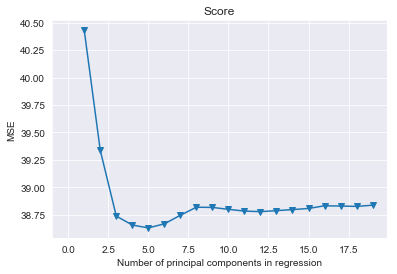

In [53]:
n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = KFold(n_splits=10, shuffle=False, random_state=1)

mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.arange(1, 20), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Score')
plt.xlim(xmin=-1);

In [54]:
RB = pd.read_csv('Input/Aggregate/RBAggregate.csv')
RBavg = pd.DataFrame()
RBavg['Name'] = RB['Name']
RBavg['Team'] = RB['Team']
RBavg['Rank'] = RB['Rank']
RBavg['RushesGame'] = RB['RushingAttempts'] / RB['Played']
RBavg['RushYardGame'] = RB['RushingYards'] / RB['Played']
RBavg['YardAttempt'] = RB['RushingYardsPerAttempt']
RBavg['RushTdGame'] = RB['RushingTouchdowns'] / RB['Played']
RBavg['TargetsGame'] = RB['ReceivingTargets'] / RB['Played']
RBavg['RecGame'] = RB['Receptions'] / RB['Played']
RBavg['RecYardsGame'] = RB['ReceivingYards'] / RB['Played']
RBavg['RecTdGame'] = RB['ReceivingTouchdowns'] / RB['Played']
RBavg['PointsGame'] = RB['FantasyPointsPerGameDraftKings']
RBavg = RBavg.set_index('Name')
RBavg.head()

,Team,Rank,RushesGame,RushYardGame,YardAttempt,RushTdGame,TargetsGame,RecGame,RecYardsGame,RecTdGame,PointsGame
Name,,,,,,,,,,,
Todd Gurley,LAR,1,19.416667,97.916667,5.0,1.250000,5.083333,3.833333,39.500000,0.333333,29.0
Saquon Barkley,NYG,2,16.250000,79.500000,4.9,0.666667,7.583333,6.166667,50.166667,0.333333,26.6
Christian McCaffrey,CAR,3,13.583333,71.916667,5.3,0.416667,7.666667,6.666667,55.250000,0.500000,26.0
Alvin Kamara,NO,4,13.416667,61.833333,4.6,0.916667,7.000000,5.416667,46.250000,0.333333,24.8
James Conner,PIT,5,16.750000,75.750000,4.5,1.000000,5.666667,4.333333,38.916667,0.083333,23.7


In [55]:
RB_RZ = pd.read_csv('Input/RZ/RBRZ.csv')
RBRZavg = pd.DataFrame()
RBRZavg['Name'] = RB_RZ['Name']
RBRZavg['RZattemptsGame'] = RB_RZ['RushingAttempts'] / RB_RZ['Played']
RBRZavg['RZyardsGame'] = RB_RZ['RushingYards'] / RB_RZ['Played']
RBRZavg['RZYardAtt'] = RB_RZ['RushingYardsPerAttempt']
RBRZavg['RZTDGame'] = RB_RZ['RushingTouchdowns'] / RB_RZ['Played']
RBRZavg['RZTarGame'] = RB_RZ['ReceivingTargets'] / RB_RZ['Played']
RBRZavg['RZRecGame'] = RB_RZ['Receptions'] / RB_RZ['Played']
RBRZavg['RZRecYarGame'] = RB_RZ['ReceivingYards'] / RB_RZ['Played']
RBRZavg['RZRecTDGame'] = RB_RZ['ReceivingTouchdowns'] / RB_RZ['Played']
RBRZavg['RZPointsGame'] = RB_RZ['FantasyPointsPerGameDraftKings']
RBRZ = RBRZavg.set_index('Name')
RBRZ.head()

,RZattemptsGame,RZyardsGame,RZYardAtt,RZTDGame,RZTarGame,RZRecGame,RZRecYarGame,RZRecTDGame,RZPointsGame
Name,,,,,,,,,
Todd Gurley,5.083333,16.416667,3.2,1.250000,1.333333,0.666667,5.75,0.250000,12.4
Alvin Kamara,3.666667,11.416667,3.1,0.833333,1.833333,1.500000,9.50,0.250000,10.4
Melvin Gordon,2.000000,11.100000,5.6,0.700000,1.300000,0.800000,3.30,0.300000,8.6
Christian McCaffrey,2.666667,7.083333,2.7,0.416667,1.083333,0.916667,5.75,0.416667,7.1
James Conner,2.750000,7.333333,2.7,0.750000,0.583333,0.500000,3.00,0.083333,6.9


In [56]:
RBsnaps = pd.read_csv('Input/Aggregate/RBSnaps.csv')
RBsnaps.head()

,Rank,Name,Team,Position,Played,SnapsPlayed,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointsDraftKings,FantasyPointSnapPercentageDraftKings
0,1,Justin Jackson,LAC,RB,5,39,7.8,13.4,51.3,7.7,59.0,59.0,25.5,65.4
1,2,Nick Chubb,CLE,RB,12,261,21.8,30.9,50.2,6.1,54.8,56.3,154.7,59.3
2,3,Leonard Fournette,JAX,RB,5,149,29.8,35.7,60.4,9.4,69.8,69.8,88.8,59.6
3,4,Phillip Lindsay,DEN,RB,12,345,28.8,44.2,44.6,9.3,51.9,53.9,200.6,58.1
4,5,Melvin Gordon,LAC,RB,10,451,45.1,64.5,33.9,13.3,43.7,47.2,263.5,58.4


In [57]:
RBsnaps = RBsnaps.drop(['Team', 'FantasyPointsDraftKings', 'SnapsPlayed', 'Played', 'Position', 'Rank'], axis=1)
RBsnaps = RBsnaps.set_index('Name')

In [58]:
RBDef = pd.DataFrame()
RBDef['Team'] = Defense['Team']
RBDef['DPointsAllowed'] = Defense['DraftKingsRunningbackFantasyPointsAllowedAverage']
RBDef = RBDef.set_index('Team')
RBDef.head()

,DPointsAllowed
Team,
BAL,17.22
JAX,18.67
BUF,27.20
DAL,21.50
MIN,22.68


In [59]:
RBSalaries = pd.read_csv('Input/Salaries/RBSalaries.csv').dropna()
RBSalaries = RBSalaries.drop(['Rank', 'Position', 'Week', 'UpcomingOpponentRank', \
'UpcomingOpponentPositionRank'], axis=1)
RBSalaries = RBSalaries.set_index('Opponent')
RBSalaries.head()

,Name,Team,DraftKingsSalary,FantasyPointsDraftKings
Opponent,,,,
CLE,Christian McCaffrey,CAR,9300.0,22.13
CHI,Todd Gurley,LAR,8800.0,21.88
TB,Alvin Kamara,NO,8100.0,21.63
PHI,Ezekiel Elliott,DAL,8600.0,21.59
WAS,Saquon Barkley,NYG,8900.0,21.49


In [60]:
RBSalaries = RBSalaries.join(RBDef).join(RBDefense)
RBSalaries = RBSalaries.set_index('Team').join(Vegas).join(RBOffense)
RBSalaries.head()

,Name,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,...,PointsPerGame,OffensivePlays,OffensiveYards,OffensiveYardsPerPlay,FirstDowns,ThirdDownAttempts,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,OpponentTacklesForLossPercentage
Team,,,,,,,,,,,,,,,,,,,,,
ARI,David Johnson,6500.0,16.44,28.96,26.3,58.176266,354.051266,6.1,20.640506,10.736392,...,14.6,54.645714,239.606857,4.4,14.349714,11.846857,30.3,1.752000,71.4,25.2
ARI,Chase Edmonds,3800.0,5.14,28.96,26.3,58.176266,354.051266,6.1,20.640506,10.736392,...,14.6,54.645714,239.606857,4.4,14.349714,11.846857,30.3,1.752000,71.4,25.2
ARI,TJ Logan,3000.0,0.32,28.96,26.3,58.176266,354.051266,6.1,20.640506,10.736392,...,14.6,54.645714,239.606857,4.4,14.349714,11.846857,30.3,1.752000,71.4,25.2
ARI,Derrick Coleman,3000.0,0.14,28.96,26.3,58.176266,354.051266,6.1,20.640506,10.736392,...,14.6,54.645714,239.606857,4.4,14.349714,11.846857,30.3,1.752000,71.4,25.2
ATL,Tevin Coleman,4400.0,12.21,24.56,23.9,63.455749,351.588153,5.5,20.152613,13.740418,...,24.7,62.834797,378.093581,6.0,22.029730,12.934122,47.7,2.920608,65.7,34.9


In [61]:
RBSalaries = RBSalaries.set_index('Name')
RBSalaries.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,PointsPerGame,OffensivePlays,OffensiveYards,OffensiveYardsPerPlay,FirstDowns,ThirdDownAttempts,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,OpponentTacklesForLossPercentage
Name,,,,,,,,,,,,,,,,,,,,,
David Johnson,6500.0,16.44,28.96,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,14.6,54.645714,239.606857,4.4,14.349714,11.846857,30.3,1.752000,71.4,25.2
Chase Edmonds,3800.0,5.14,28.96,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,14.6,54.645714,239.606857,4.4,14.349714,11.846857,30.3,1.752000,71.4,25.2
TJ Logan,3000.0,0.32,28.96,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,14.6,54.645714,239.606857,4.4,14.349714,11.846857,30.3,1.752000,71.4,25.2
Derrick Coleman,3000.0,0.14,28.96,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,14.6,54.645714,239.606857,4.4,14.349714,11.846857,30.3,1.752000,71.4,25.2
Tevin Coleman,4400.0,12.21,24.56,23.9,63.455749,351.588153,5.5,20.152613,13.740418,38.2,...,24.7,62.834797,378.093581,6.0,22.029730,12.934122,47.7,2.920608,65.7,34.9


In [62]:
RBs = RBSalaries.join(RBavg).join(RBRZ).join(RBsnaps).dropna()
RBs.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,RZRecYarGame,RZRecTDGame,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
Name,,,,,,,,,,,,,,,,,,,,,
David Johnson,6500.0,16.44,28.96,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,1.00,0.083333,4.5,46.8,81.9,36.5,9.1,42.8,45.6,34.4
Chase Edmonds,3800.0,5.14,28.96,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,0.00,0.000000,1.2,11.2,19.6,29.1,12.7,40.3,41.8,36.1
TJ Logan,3000.0,0.32,28.96,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,0.00,0.000000,0.0,1.7,2.9,10.0,30.0,40.0,40.0,54.0
Derrick Coleman,3000.0,0.14,28.96,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,0.00,0.000000,0.0,4.8,8.5,3.4,5.2,6.9,8.6,6.9
Tevin Coleman,4400.0,12.21,24.56,23.9,63.455749,351.588153,5.5,20.152613,13.740418,38.2,...,4.25,0.333333,3.9,38.2,57.5,27.9,8.7,34.5,36.7,33.5


In [63]:
X_test = RBs[X_train.columns]
X_test

,RushesGame,RushYardGame,YardAttempt,RushTdGame,TargetsGame,RecGame,RecYardsGame,RecTdGame,PointsGame,RZattemptsGame,...,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,OpponentRedZoneAttempts,OpponentRedZonePercentage,OpponentRushingYards,OpponentRushingYardsPerAttempt,TacklesForLossPercentage,OpponentRushingTouchdowns
Name,,,,,,,,,,,,,,,,,,,,,
David Johnson,17.083333,63.416667,3.7,0.500000,4.250000,2.916667,27.333333,0.166667,16.1,1.916667,...,6.1,20.640506,10.736392,39.5,3.245886,61.5,119.598418,4.7,17.4,0.832278
Chase Edmonds,3.250000,11.500000,3.5,0.166667,1.416667,1.250000,6.333333,0.000000,4.0,0.416667,...,6.1,20.640506,10.736392,39.5,3.245886,61.5,119.598418,4.7,17.4,0.832278
TJ Logan,0.166667,0.833333,5.0,0.000000,0.500000,0.500000,3.166667,0.000000,0.9,0.000000,...,6.1,20.640506,10.736392,39.5,3.245886,61.5,119.598418,4.7,17.4,0.832278
Derrick Coleman,0.166667,0.250000,1.5,0.000000,0.250000,0.166667,1.416667,0.000000,0.3,0.000000,...,6.1,20.640506,10.736392,39.5,3.245886,61.5,119.598418,4.7,17.4,0.832278
Tevin Coleman,10.666667,42.833333,4.0,0.166667,3.333333,2.500000,22.583333,0.416667,12.8,1.250000,...,5.5,20.152613,13.740418,38.2,3.247735,56.4,127.744251,4.6,17.9,0.999303
Ito Smith,5.833333,18.416667,3.2,0.333333,2.083333,1.833333,11.083333,0.000000,6.8,1.500000,...,5.5,20.152613,13.740418,38.2,3.247735,56.4,127.744251,4.6,17.9,0.999303
Brian Hill,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,5.5,20.152613,13.740418,38.2,3.247735,56.4,127.744251,4.6,17.9,0.999303
Ricky Ortiz,0.000000,0.000000,0.0,0.000000,0.300000,0.200000,0.700000,0.000000,0.3,0.000000,...,5.5,20.152613,13.740418,38.2,3.247735,56.4,127.744251,4.6,17.9,0.999303
Devonta Freeman,7.000000,34.000000,4.9,0.000000,3.500000,2.500000,11.500000,0.000000,7.0,1.500000,...,5.5,20.152613,13.740418,38.2,3.247735,56.4,127.744251,4.6,17.9,0.999303


In [64]:
X_train.columns

Index(['RushesGame', 'RushYardGame', 'YardAttempt', 'RushTdGame',
       'TargetsGame', 'RecGame', 'RecYardsGame', 'RecTdGame', 'PointsGame',
       'RZattemptsGame', 'RZyardsGame', 'RZYardAtt', 'RZTDGame', 'RZTarGame',
       'RZRecGame', 'RZRecYarGame', 'RZRecTDGame', 'RZPointsGame',
       'SnapsPlayedPercentage', 'RushSnapPercentage', 'TargetSnapPercentage',
       'TouchSnapPercentage', 'IntendedTouchSnapPercentage', 'DPointsAllowed',
       'Home', 'PointSpread', 'OverUnder', 'total', 'PointsPerGame',
       'OffensivePlays', 'OffensiveYards', 'OffensiveYardsPerPlay',
       'FirstDowns', 'ThirdDownAttempts', 'ThirdDownPercentage',
       'RedZoneAttempts', 'RedZonePercentage',
       'OpponentTacklesForLossPercentage', 'OpponentPointsPerGame',
       'OpponentOffensivePlays', 'OpponentOffensiveYards',
       'OpponentOffensiveYardsPerPlay', 'OpponentFirstDowns',
       'OpponentThirdDownAttempts', 'OpponentThirdDownPercentage',
       'OpponentRedZoneAttempts', 'OpponentRedZoneP

In [65]:
pls = PLSRegression(n_components=5)
pls.fit(scale(X_train), y_train)
PLSProjections = pls.predict(scale(X_test))

In [66]:
regr2 = RandomForestRegressor(n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features='sqrt', max_depth=20, \
                              bootstrap=True, random_state=1)
regr2.fit(X_train, y_train)
RBRFproj = regr2.predict(X_test)

In [67]:
RBs['PLSProjections'] = PLSProjections
RBs['RFProjections'] = RBRFproj
RBs

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,PLSProjections,RFProjections
Name,,,,,,,,,,,,,,,,,,,,,
David Johnson,6500.0,16.44,28.96,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,4.5,46.8,81.9,36.5,9.1,42.8,45.6,34.4,15.993407,15.606298
Chase Edmonds,3800.0,5.14,28.96,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,1.2,11.2,19.6,29.1,12.7,40.3,41.8,36.1,4.184018,5.956052
TJ Logan,3000.0,0.32,28.96,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,0.0,1.7,2.9,10.0,30.0,40.0,40.0,54.0,0.655328,2.142070
Derrick Coleman,3000.0,0.14,28.96,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,0.0,4.8,8.5,3.4,5.2,6.9,8.6,6.9,0.423656,0.870130
Tevin Coleman,4400.0,12.21,24.56,23.9,63.455749,351.588153,5.5,20.152613,13.740418,38.2,...,3.9,38.2,57.5,27.9,8.7,34.5,36.7,33.5,12.467951,12.352261
Ito Smith,3400.0,7.12,24.56,23.9,63.455749,351.588153,5.5,20.152613,13.740418,38.2,...,2.8,20.8,31.2,28.1,10.0,36.9,38.2,32.7,7.507620,7.353970
Brian Hill,3000.0,0.33,24.56,23.9,63.455749,351.588153,5.5,20.152613,13.740418,38.2,...,0.0,1.2,1.1,0.0,0.0,0.0,0.0,0.0,0.220716,0.515829
Ricky Ortiz,3000.0,0.15,24.56,23.9,63.455749,351.588153,5.5,20.152613,13.740418,38.2,...,0.0,10.3,12.9,0.0,2.9,1.9,2.9,2.6,0.966330,0.573104
Devonta Freeman,3000.0,0.00,24.56,23.9,63.455749,351.588153,5.5,20.152613,13.740418,38.2,...,0.2,33.5,32.7,20.9,10.4,28.4,31.3,21.0,9.252235,9.105767


In [68]:
RBs.to_csv('Projections/RBWeek12.csv')

In [69]:
RBScores = pd.read_csv('Scores/RBScores.csv')
RB = pd.DataFrame({'Name': [], 'Score': []})
RB['Name'] = RBScores['Name']
RB['Score'] = RBScores['FantasyPointsDraftKings']
RB = RB.set_index('Name')
RBs = RBs.join(RB)
RBs = RBs.dropna()
RBs

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,PLSProjections,RFProjections,Score
Name,,,,,,,,,,,,,,,,,,,,,
David Johnson,6500.0,16.44,28.96,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,46.8,81.9,36.5,9.1,42.8,45.6,34.4,15.993407,15.606298,14.1
Chase Edmonds,3800.0,5.14,28.96,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,11.2,19.6,29.1,12.7,40.3,41.8,36.1,4.184018,5.956052,1.4
TJ Logan,3000.0,0.32,28.96,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,1.7,2.9,10.0,30.0,40.0,40.0,54.0,0.655328,2.142070,0.0
Derrick Coleman,3000.0,0.14,28.96,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,4.8,8.5,3.4,5.2,6.9,8.6,6.9,0.423656,0.870130,0.0
Tevin Coleman,4400.0,12.21,24.56,23.9,63.455749,351.588153,5.5,20.152613,13.740418,38.2,...,38.2,57.5,27.9,8.7,34.5,36.7,33.5,12.467951,12.352261,5.1
Ito Smith,3400.0,7.12,24.56,23.9,63.455749,351.588153,5.5,20.152613,13.740418,38.2,...,20.8,31.2,28.1,10.0,36.9,38.2,32.7,7.507620,7.353970,10.4
Brian Hill,3000.0,0.33,24.56,23.9,63.455749,351.588153,5.5,20.152613,13.740418,38.2,...,1.2,1.1,0.0,0.0,0.0,0.0,0.0,0.220716,0.515829,0.5
Gus Edwards,4500.0,11.56,33.18,27.2,69.372477,416.234862,6.0,26.118654,12.227523,39.5,...,23.4,32.7,46.3,0.6,47.0,47.0,32.7,8.147391,10.622087,6.7
Ty Montgomery,4000.0,7.97,33.18,27.2,69.372477,416.234862,6.0,26.118654,12.227523,39.5,...,21.4,27.5,17.3,15.4,28.0,32.7,31.7,7.403734,8.286522,1.2


In [70]:
y_test = RBs.Score
y_pred = RBs.PLSProjections
mean_squared_error(y_test, y_pred)

49.313737773641066

In [71]:
y_test = RBs.Score
y_pred = RBs.RFProjections
mean_squared_error(y_test, y_pred)

48.9160354614435

In [72]:
y_test = RBs.Score
y_pred = RBs.FantasyPointsDraftKings
mean_squared_error(y_test, y_pred)

43.57299824561403

In [73]:
y_test = RBs.Score
y_pred = RBs.PointsGame
mean_squared_error(y_test, y_pred)

53.62008771929824

In [74]:
RBs['Projections'] = (RBs.PLSProjections + RBs.RFProjections) / 2

In [75]:
y_test = RBs.Score
y_pred = RBs.Projections
mean_squared_error(y_test, y_pred)

48.6296218267997

In [76]:
RBs = RBs.reset_index()
RBs = RBs[RBtrain.columns]
RBtrain = RBtrain.append(RBs, ignore_index=True, sort=False)
RBtrain.to_csv('RBtrain.csv')

In [77]:
WRtrain = pd.read_csv('TrainingBig/WRtrain.csv')

In [78]:
WRtrain = WRtrain.drop('Unnamed: 0', axis=1)
WRtrain.describe()

,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
count,6290.000000,6290.000000,6290.000000,6290.000000,6290.000000,6290.000000,6290.000000,6290.000000,6290.000000,6290.000000,...,6290.000000,6290.000000,6290.000000,6290.000000,6290.000000,6290.000000,6290.000000,6290.000000,6290.000000,6290.000000
mean,4.899706,2.980987,52.993322,38.179919,0.246848,6.742874,10.518535,0.139388,0.770420,0.726630,...,55.566757,6.222464,14.942178,98.387818,63.237647,238.965703,6.799555,10.745533,1.584415,88.389666
std,3.187496,2.096893,20.586289,28.364617,0.281187,3.268685,5.174975,0.352875,2.392838,2.231946,...,8.693019,1.320918,2.275309,124.292619,3.468298,23.983771,0.603166,0.748340,0.366273,9.304122
min,0.000000,0.000000,0.000000,-2.000000,0.000000,-2.000000,-2.000000,0.000000,-7.000000,-7.000000,...,34.800000,3.000000,9.800000,30.687500,55.400000,169.875000,5.300000,9.200000,0.812500,66.000000
25%,2.333333,1.250000,42.900000,14.000000,0.000000,4.800000,7.466667,0.000000,0.000000,0.000000,...,50.000000,5.400000,13.300000,34.062500,60.600000,225.000000,6.400000,10.200000,1.312500,82.000000
50%,4.636364,2.692308,56.489899,34.095455,0.181818,6.957143,10.866667,0.000000,0.000000,0.000000,...,55.300000,6.200000,14.500000,35.687500,63.200000,237.875000,6.800000,10.700000,1.562500,88.000000
75%,7.111111,4.428571,66.700000,56.700000,0.375000,8.758889,13.600000,0.125000,0.200000,0.181818,...,60.000000,7.100000,16.600000,39.687500,64.900000,251.250000,7.200000,11.200000,1.875000,94.000000
max,19.000000,16.000000,100.000000,180.000000,2.000000,31.300000,50.000000,4.000000,31.000000,34.000000,...,88.900000,10.100000,22.300000,468.000000,74.700000,313.333333,8.900000,13.600000,2.812500,123.000000


In [79]:
X_train = WRtrain.drop(['Score', 'Name'], axis=1).astype('float64')
y_train = WRtrain.Score

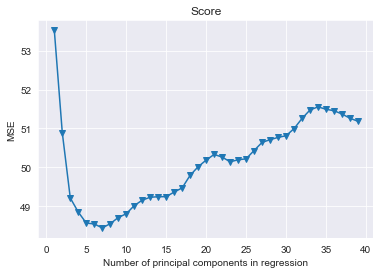

In [80]:
n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = KFold(n_splits=10, shuffle=False, random_state=1)

mse = []

for i in np.arange(1, 40):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.arange(1, 40), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Score')
plt.xlim(xmin=-1);

In [81]:
WR = pd.read_csv('Input/Aggregate/WRAggregate.csv')
WRavg = pd.DataFrame()
WRavg['Name'] = WR['Name']
WRavg['Rank'] = WR['Rank']
WRavg['Team'] = WR['Team']
WRavg['TargetsGame'] = WR['ReceivingTargets'] / WR['Played']
WRavg['RecGame'] = WR['Receptions'] / WR['Played']
WRavg['RecPercentage'] = WR['ReceptionPercentage']
WRavg['RecYardsGame'] = WR['ReceivingYards'] / WR['Played']
WRavg['RecTdGame'] = WR['ReceivingTouchdowns'] / WR['Played']
WRavg['YardsTarget'] = WR['ReceivingYardsPerTarget']
WRavg['RecYardsRec'] = WR['ReceivingYardsPerReception']
WRavg['RushesGame'] = WR['RushingAttempts'] / WR['Played']
WRavg['RushYardsGame'] = WR['RushingYards'] / WR['Played']
WRavg['YardAttempt'] = WR['RushingYardsPerAttempt']
WRavg['RushTdGame'] = WR['RushingTouchdowns']
WRavg['PointsGame'] = WR['FantasyPointsPerGameDraftKings']
WRavg = WRavg.set_index('Name')
WRavg.head()

,Rank,Team,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,RushTdGame,PointsGame
Name,,,,,,,,,,,,,,
Adam Thielen,1,MIN,11.333333,8.166667,72.1,97.166667,0.750000,8.6,11.9,0.166667,1.666667,10.0,0,24.9
Davante Adams,2,GB,10.583333,7.083333,66.9,92.916667,0.916667,8.8,13.1,0.000000,0.000000,0.0,0,22.9
Tyreek Hill,3,KC,8.333333,5.500000,66.0,93.250000,0.916667,11.2,17.0,1.250000,9.833333,7.9,0,22.8
Antonio Brown,4,PIT,11.250000,6.750000,60.0,85.666667,1.000000,7.6,12.7,0.000000,0.000000,0.0,0,22.3
Julio Jones,5,ATL,11.083333,7.166667,64.7,110.250000,0.250000,9.9,15.4,0.166667,1.000000,6.0,0,21.6


In [82]:
WRRZ = pd.read_csv('Input/RZ/WRRZ.csv')
WRRZavg = pd.DataFrame()
WRRZavg['Name'] = WRRZ['Name']
WRRZavg['RZTargetsGame'] = WRRZ['ReceivingTargets'] / WRRZ['Played']
WRRZavg['RZRecGame'] = WRRZ['Receptions'] / WRRZ['Played']
WRRZavg['RZRecPercentage'] = WRRZ['ReceptionPercentage']
WRRZavg['RZRecYardsGame'] = WRRZ['ReceivingYards'] / WRRZ['Played']
WRRZavg['RZRecTdGame'] = WRRZ['ReceivingTouchdowns'] / WRRZ['Played']
WRRZavg['RZYardsTarget'] = WRRZ['ReceivingYardsPerTarget']
WRRZavg['RZRecYardsRec'] = WRRZ['ReceivingYardsPerReception']
WRRZavg['RZRushesGame'] = WRRZ['RushingAttempts'] / WRRZ['Played']
WRRZavg['RZRushYardsGame'] = WRRZ['RushingYards'] / WRRZ['Played']
WRRZavg['RZYardAttempt'] = WRRZ['RushingYardsPerAttempt']
WRRZavg['RZRushTdGame'] = WRRZ['RushingTouchdowns'] / WRRZ['Played']
WRRZavg['RZPointsGame'] = WRRZ['FantasyPointsPerGameDraftKings']
WRRZ = WRRZavg.set_index('Name')
WRRZ.head()

,RZTargetsGame,RZRecGame,RZRecPercentage,RZRecYardsGame,RZRecTdGame,RZYardsTarget,RZRecYardsRec,RZRushesGame,RZRushYardsGame,RZYardAttempt,RZRushTdGame,RZPointsGame
Name,,,,,,,,,,,,
Davante Adams,2.083333,1.083333,52.0,9.666667,0.833333,4.6,8.9,0.0,0.0,0.0,0.0,7.0
Michael Thomas,1.666667,1.333333,80.0,10.000000,0.500000,6.0,7.5,0.0,0.0,0.0,0.0,5.3
Adam Thielen,1.416667,1.083333,76.5,6.500000,0.500000,4.6,6.0,0.0,0.0,0.0,0.0,4.8
DeAndre Hopkins,1.416667,0.833333,58.8,7.083333,0.500000,5.0,8.5,0.0,0.0,0.0,0.0,4.5
Keenan Allen,1.000000,0.833333,83.3,7.333333,0.416667,7.3,8.8,0.0,0.0,0.0,0.0,4.2


In [83]:
WRsnaps = pd.read_csv('Input/Aggregate/WRSnaps.csv')
WRsnaps.head()

,Rank,Name,Team,Position,Played,SnapsPlayed,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointsDraftKings,FantasyPointSnapPercentageDraftKings
0,1,Tim White,BAL,WR,3,2,0.7,0.8,0.0,50.0,50.0,50.0,2.40,120.0
1,2,Leonte Carroo,MIA,WR,5,39,7.8,13.0,2.6,7.7,7.7,10.3,18.80,48.2
2,3,Curtis Samuel,CAR,WR,9,224,24.9,35.7,2.7,16.1,13.8,18.8,96.00,42.9
3,4,Albert Wilson,MIA,WR,7,231,33.0,48.2,3.5,15.2,15.2,19.0,99.78,43.2
4,5,Tavon Austin,DAL,WR,6,106,17.7,14.8,5.7,9.4,12.3,15.1,37.50,35.4


In [84]:
WRsnaps = WRsnaps.drop(['Team', 'FantasyPointsDraftKings', 'SnapsPlayed', 'Played', 'Position', 'Rank'], axis=1)
WRsnaps = WRsnaps.set_index('Name')

In [85]:
WRDef = pd.DataFrame()
WRDef['Team'] = Defense['Team']
WRDef['DPointsAllowed'] = Defense['DraftKingsWideReceiverFantasyPointsAllowedAverage']
WRDef = WRDef.set_index('Team')
WRDef.head()

,DPointsAllowed
Team,
BAL,29.30
JAX,30.39
BUF,29.72
DAL,29.66
MIN,31.52


In [86]:
WRSalaries = pd.read_csv('Input/Salaries/WRSalaries.csv').dropna()
WRSalaries = WRSalaries.drop(['Rank', 'Position', 'Week', 'UpcomingOpponentRank', \
'UpcomingOpponentPositionRank'], axis=1)
WRSalaries = WRSalaries.set_index('Opponent')
WRSalaries.head()

,Name,Team,DraftKingsSalary,FantasyPointsDraftKings
Opponent,,,,
GB,Julio Jones,ATL,7900.0,22.90
ATL,Davante Adams,GB,8400.0,20.30
OAK,Antonio Brown,PIT,9000.0,20.07
IND,DeAndre Hopkins,HOU,7800.0,18.79
TB,Michael Thomas,NO,8600.0,18.60


In [87]:
WRSalaries = WRSalaries.join(WRDef).join(QBDefense)
WRSalaries = WRSalaries.set_index('Team').join(Vegas).join(WROffense)
WRSalaries.head()


,Name,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,...,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,PassingAttempts,CompletionPercentage,PassingYards,TeamPassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PasserRating
Team,,,,,,,,,,,,,,,,,,,,,
ARI,Larry Fitzgerald,4900.0,12.96,37.48,26.3,58.176266,354.051266,6.1,20.640506,10.736392,...,30.3,1.752,71.4,27.281143,57.2,142.412571,5.2,9.1,1.001143,65
ARI,Chad Williams,3000.0,5.37,37.48,26.3,58.176266,354.051266,6.1,20.640506,10.736392,...,30.3,1.752,71.4,27.281143,57.2,142.412571,5.2,9.1,1.001143,65
ARI,Trent Sherfield,3000.0,3.99,37.48,26.3,58.176266,354.051266,6.1,20.640506,10.736392,...,30.3,1.752,71.4,27.281143,57.2,142.412571,5.2,9.1,1.001143,65
ARI,JJ Nelson,3000.0,3.09,37.48,26.3,58.176266,354.051266,6.1,20.640506,10.736392,...,30.3,1.752,71.4,27.281143,57.2,142.412571,5.2,9.1,1.001143,65
ARI,Christian Kirk,4600.0,0.00,37.48,26.3,58.176266,354.051266,6.1,20.640506,10.736392,...,30.3,1.752,71.4,27.281143,57.2,142.412571,5.2,9.1,1.001143,65


In [88]:
WRSalaries = WRSalaries.set_index('Name')
WRSalaries.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,PassingAttempts,CompletionPercentage,PassingYards,TeamPassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PasserRating
Name,,,,,,,,,,,,,,,,,,,,,
Larry Fitzgerald,4900.0,12.96,37.48,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,30.3,1.752,71.4,27.281143,57.2,142.412571,5.2,9.1,1.001143,65
Chad Williams,3000.0,5.37,37.48,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,30.3,1.752,71.4,27.281143,57.2,142.412571,5.2,9.1,1.001143,65
Trent Sherfield,3000.0,3.99,37.48,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,30.3,1.752,71.4,27.281143,57.2,142.412571,5.2,9.1,1.001143,65
JJ Nelson,3000.0,3.09,37.48,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,30.3,1.752,71.4,27.281143,57.2,142.412571,5.2,9.1,1.001143,65
Christian Kirk,4600.0,0.00,37.48,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,30.3,1.752,71.4,27.281143,57.2,142.412571,5.2,9.1,1.001143,65


In [89]:
WRs = WRSalaries.join(WRavg).join(WRRZ).join(WRsnaps).dropna()
WRs.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,RZYardAttempt,RZRushTdGame,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
Name,,,,,,,,,,,,,,,,,,,,,
Larry Fitzgerald,4900.0,12.96,37.48,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,0.0,0.0,3.3,51.8,90.8,0.0,12.4,7.6,12.4,21.4
Chad Williams,3000.0,5.37,37.48,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,0.0,0.0,0.2,43.8,51.1,0.0,8.9,3.1,8.9,8.1
Trent Sherfield,3000.0,3.99,37.48,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,0.0,0.0,0.0,13.0,20.1,0.0,5.1,2.6,5.1,5.4
JJ Nelson,3000.0,3.09,37.48,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,0.0,0.0,0.0,12.5,21.9,2.0,8.0,4.7,10.0,4.4
Christian Kirk,4600.0,0.00,37.48,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,5.0,0.0,1.0,45.2,79.1,0.6,12.5,8.5,13.1,22.8


In [90]:
X_test = WRs[X_train.columns]
X_test

,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
Name,,,,,,,,,,,,,,,,,,,,,
Larry Fitzgerald,6.416667,3.916667,61.0,42.333333,0.416667,6.6,10.8,0.000000,0.000000,0.0,...,61.5,8.6,14.9,361,67.6,234.452848,7.8,11.5,2.080696,108
Chad Williams,3.875000,1.375000,35.5,14.125000,0.125000,3.6,10.3,0.000000,0.000000,0.0,...,61.5,8.6,14.9,361,67.6,234.452848,7.8,11.5,2.080696,108
Trent Sherfield,0.666667,0.333333,50.0,3.666667,0.000000,5.5,11.0,0.000000,0.000000,0.0,...,61.5,8.6,14.9,361,67.6,234.452848,7.8,11.5,2.080696,108
JJ Nelson,1.000000,0.333333,33.3,1.750000,0.000000,1.8,5.2,0.250000,0.416667,1.7,...,61.5,8.6,14.9,361,67.6,234.452848,7.8,11.5,2.080696,108
Christian Kirk,5.666667,3.583333,63.2,49.166667,0.250000,8.7,13.7,0.250000,2.916667,11.7,...,61.5,8.6,14.9,361,67.6,234.452848,7.8,11.5,2.080696,108
Julio Jones,11.083333,7.166667,64.7,110.250000,0.250000,9.9,15.4,0.166667,1.000000,6.0,...,56.4,8.9,15.2,389,62.5,223.843902,6.9,11.1,1.582230,93
Calvin Ridley,5.916667,4.166667,70.4,53.916667,0.666667,9.1,12.9,0.500000,2.250000,4.5,...,56.4,8.9,15.2,389,62.5,223.843902,6.9,11.1,1.582230,93
Mohamed Sanu,5.166667,3.750000,72.6,48.583333,0.250000,9.4,13.0,0.250000,0.166667,0.7,...,56.4,8.9,15.2,389,62.5,223.843902,6.9,11.1,1.582230,93
Justin Hardy,1.083333,0.666667,61.5,6.166667,0.000000,5.7,9.2,0.000000,0.000000,0.0,...,56.4,8.9,15.2,389,62.5,223.843902,6.9,11.1,1.582230,93


In [91]:
X_train.columns

Index(['TargetsGame', 'RecGame', 'RecPercentage', 'RecYardsGame', 'RecTdGame',
       'YardsTarget', 'RecYardsRec', 'RushesGame', 'RushYardsGame',
       'YardAttempt', 'RushTdGame', 'PointsGame', 'RZTargetsGame', 'RZRecGame',
       'RZRecPercentage', 'RZRecYardsGame', 'RZRecTdGame', 'RZYardsTarget',
       'RZRecYardsRec', 'RZRushesGame', 'RZRushYardsGame', 'RZYardAttempt',
       'RZRushTdGame', 'RZPointsGame', 'SnapsPlayedPercentage',
       'RushSnapPercentage', 'TargetSnapPercentage', 'TouchSnapPercentage',
       'IntendedTouchSnapPercentage', 'DPointsAllowed', 'Home', 'PointSpread',
       'OverUnder', 'total', 'PointsPerGame', 'OffensivePlays',
       'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns',
       'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneAttempts',
       'RedZonePercentage', 'PassingAttempts', 'CompletionPercentage',
       'PassingYards', 'TeamPassingYardsPerAttempt',
       'PassingYardsPerCompletion', 'PassingTouchdowns', 'PasserRating',
       

In [92]:
pls = PLSRegression(n_components=7)
pls.fit(scale(X_train), y_train)
PLSProjections = pls.predict(scale(X_test))

In [93]:
regr2 = RandomForestRegressor(n_estimators=160, min_samples_split=10, min_samples_leaf=4, max_features='sqrt', max_depth=10, \
                              bootstrap=True, random_state=1)
regr2.fit(X_train, y_train)
WRRFproj = regr2.predict(X_test)

In [94]:
WRs['PLSProjections'] = PLSProjections
WRs['RFProjections'] = WRRFproj
WRs

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,PLSProjections,RFProjections
Name,,,,,,,,,,,,,,,,,,,,,
Larry Fitzgerald,4900.0,12.96,37.48,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,3.3,51.8,90.8,0.0,12.4,7.6,12.4,21.4,13.098968,12.045199
Chad Williams,3000.0,5.37,37.48,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,0.2,43.8,51.1,0.0,8.9,3.1,8.9,8.1,7.350682,5.711820
Trent Sherfield,3000.0,3.99,37.48,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,0.0,13.0,20.1,0.0,5.1,2.6,5.1,5.4,2.808058,2.510383
JJ Nelson,3000.0,3.09,37.48,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,0.0,12.5,21.9,2.0,8.0,4.7,10.0,4.4,3.573593,1.900496
Christian Kirk,4600.0,0.00,37.48,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,1.0,45.2,79.1,0.6,12.5,8.5,13.1,22.8,12.310779,11.962103
Julio Jones,7900.0,22.90,40.16,23.9,63.455749,351.588153,5.5,20.152613,13.740418,38.2,...,0.8,54.0,81.3,0.3,20.5,13.6,20.8,40.0,20.715669,20.032013
Calvin Ridley,5200.0,11.94,40.16,23.9,63.455749,351.588153,5.5,20.152613,13.740418,38.2,...,3.4,40.2,60.5,1.2,14.7,11.6,16.0,34.7,13.104933,10.844258
Mohamed Sanu,4300.0,10.25,40.16,23.9,63.455749,351.588153,5.5,20.152613,13.740418,38.2,...,1.2,51.6,77.7,0.5,10.0,7.9,10.7,20.3,12.548135,10.294747
Justin Hardy,3000.0,2.15,40.16,23.9,63.455749,351.588153,5.5,20.152613,13.740418,38.2,...,0.1,14.2,21.5,0.0,7.6,4.7,7.6,9.0,3.928702,2.378810


In [95]:
WRs.to_csv('Projections/WRWeek12.csv')

In [96]:
WRScores = pd.read_csv('Scores/WRScores.csv')
WR = pd.DataFrame({'Name': [], 'Score': []})
WR['Name'] = WRScores['Name']
WR['Score'] = WRScores['FantasyPointsDraftKings']
WR = WR.set_index('Name')
WRs = WRs.join(WR)
WRs = WRs.dropna()
WRs

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,PLSProjections,RFProjections,Score
Name,,,,,,,,,,,,,,,,,,,,,
Larry Fitzgerald,4900.0,12.96,37.48,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,51.8,90.8,0.0,12.4,7.6,12.4,21.4,13.098968,12.045199,10.5
Trent Sherfield,3000.0,3.99,37.48,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,13.0,20.1,0.0,5.1,2.6,5.1,5.4,2.808058,2.510383,12.7
JJ Nelson,3000.0,3.09,37.48,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,12.5,21.9,2.0,8.0,4.7,10.0,4.4,3.573593,1.900496,6.8
Julio Jones,7900.0,22.90,40.16,23.9,63.455749,351.588153,5.5,20.152613,13.740418,38.2,...,54.0,81.3,0.3,20.5,13.6,20.8,40.0,20.715669,20.032013,33.6
Calvin Ridley,5200.0,11.94,40.16,23.9,63.455749,351.588153,5.5,20.152613,13.740418,38.2,...,40.2,60.5,1.2,14.7,11.6,16.0,34.7,13.104933,10.844258,2.0
Mohamed Sanu,4300.0,10.25,40.16,23.9,63.455749,351.588153,5.5,20.152613,13.740418,38.2,...,51.6,77.7,0.5,10.0,7.9,10.7,20.3,12.548135,10.294747,11.4
Justin Hardy,3000.0,2.15,40.16,23.9,63.455749,351.588153,5.5,20.152613,13.740418,38.2,...,14.2,21.5,0.0,7.6,4.7,7.6,9.0,3.928702,2.378810,12.0
Marvin Hall,3000.0,1.92,40.16,23.9,63.455749,351.588153,5.5,20.152613,13.740418,38.2,...,11.8,17.7,0.7,9.2,7.1,9.9,20.7,3.953571,2.875017,-0.3
Russell Gage,3000.0,0.33,40.16,23.9,63.455749,351.588153,5.5,20.152613,13.740418,38.2,...,1.2,1.6,0.0,15.4,15.4,15.4,27.7,2.028490,1.207780,0.0


In [97]:
y_test = WRs.Score
y_pred = WRs.PLSProjections
mean_squared_error(y_test, y_pred)

51.79237031790957

In [98]:
y_test = WRs.Score
y_pred = WRs.RFProjections
mean_squared_error(y_test, y_pred)

47.45147192836801

In [99]:
y_test = WRs.Score
y_pred = WRs.FantasyPointsDraftKings
mean_squared_error(y_test, y_pred)

43.143148076923076

In [100]:
y_test = WRs.Score
y_pred = WRs.PointsGame
mean_squared_error(y_test, y_pred)

48.30621794871794

In [101]:
WRs['Projections'] = (WRs.PLSProjections + WRs.RFProjections) / 2

In [102]:
y_test = WRs.Score
y_pred = WRs.Projections
mean_squared_error(y_test, y_pred)

48.84826664151595

In [103]:
WRs = WRs.reset_index()
WRs = WRs[WRtrain.columns]
WRtrain = WRtrain.append(WRs, ignore_index=True, sort=False)
WRtrain.to_csv('WRtrain.csv')

In [104]:
TEtrain = pd.read_csv('TrainingBig/TEtrain.csv')

In [105]:
TEtrain = TEtrain.drop('Unnamed: 0', axis=1)
TEtrain.describe()

,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
count,3050.000000,3050.000000,3050.000000,3050.000000,3050.000000,3050.000000,3050.000000,3050.000000,3050.000000,3050.000000,...,3050.000000,3050.000000,3050.000000,3050.000000,3050.000000,3050.000000,3050.000000,3050.000000,3050.000000,3050.000000
mean,3.326417,2.198848,54.840799,24.694013,0.198430,6.084661,8.432453,0.009458,0.031262,0.043377,...,55.640590,6.236361,14.934197,101.054447,63.253344,239.246328,6.806885,10.754000,1.589770,88.451803
std,2.444353,1.696696,21.819252,20.873759,0.246213,3.275455,4.515378,0.048435,0.241669,0.409371,...,8.869628,1.340364,2.284945,126.372805,3.506538,24.382974,0.612731,0.754511,0.372518,9.427555
min,0.000000,0.000000,0.000000,-0.600000,0.000000,-0.600000,-0.600000,0.000000,-0.800000,-1.000000,...,34.800000,3.000000,9.800000,30.687500,55.400000,169.875000,5.300000,9.200000,0.812500,66.000000
25%,1.250000,0.804545,41.666667,8.000000,0.000000,4.063542,5.251389,0.000000,0.000000,0.000000,...,50.000000,5.400000,13.300000,34.062500,60.600000,225.000000,6.400000,10.200000,1.312500,82.000000
50%,2.666667,1.750000,58.781250,19.000000,0.125000,6.000000,8.526786,0.000000,0.000000,0.000000,...,55.300000,6.200000,14.600000,35.812500,63.300000,237.500000,6.800000,10.700000,1.562500,89.000000
75%,5.000000,3.400000,70.074583,37.500000,0.307692,8.029643,11.166667,0.000000,0.000000,0.000000,...,60.000000,7.100000,16.600000,40.015625,64.900000,252.375000,7.200000,11.200000,1.875000,95.000000
max,14.000000,9.000000,100.000000,114.500000,3.000000,33.750000,41.000000,1.000000,5.500000,10.000000,...,88.900000,10.100000,22.300000,468.000000,74.700000,313.333333,8.900000,13.600000,2.812500,123.000000


In [106]:
X_train = TEtrain.drop(['Score', 'Name'], axis=1).astype('float64')
y_train = TEtrain.Score

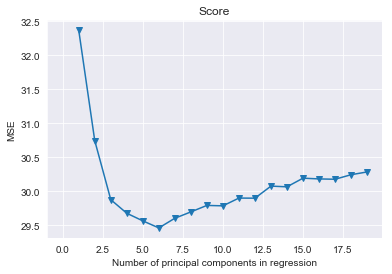

In [107]:
n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = KFold(n_splits=10, shuffle=False, random_state=1)

mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.arange(1, 20), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Score')
plt.xlim(xmin=-1);

In [108]:
TE = pd.read_csv('Input/Aggregate/TEAggregate.csv')
TEavg = pd.DataFrame()
TEavg['Name'] = TE['Name']
TEavg['Rank'] = TE['Rank']
TEavg['Team'] = TE['Team']
TEavg['TargetsGame'] = TE['ReceivingTargets'] / TE['Played']
TEavg['RecGame'] = TE['Receptions'] / TE['Played']
TEavg['RecPercentage'] = TE['ReceptionPercentage']
TEavg['RecYardsGame'] = TE['ReceivingYards'] / TE['Played']
TEavg['RecTdGame'] = TE['ReceivingTouchdowns'] / TE['Played']
TEavg['YardsTarget'] = TE['ReceivingYardsPerTarget']
TEavg['RecYardsRec'] = TE['ReceivingYardsPerReception']
TEavg['RushesGame'] = TE['RushingAttempts'] / TE['Played']
TEavg['RushYardsGame'] = TE['RushingYards'] / TE['Played']
TEavg['YardAttempt'] = TE['RushingYardsPerAttempt']
TEavg['RushTdGame'] = TE['RushingTouchdowns']
TEavg['PointsGame'] = TE['FantasyPointsPerGameDraftKings']
TEavg = TEavg.set_index('Name')
TEavg.head()

,Rank,Team,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,RushTdGame,PointsGame
Name,,,,,,,,,,,,,,
Travis Kelce,1,KC,9.500000,6.583333,69.3,90.166667,0.750000,9.5,13.7,0.000000,0.000000,0.0,0,21.3
Zach Ertz,2,PHI,10.083333,7.750000,76.9,81.500000,0.500000,8.1,10.5,0.000000,0.000000,0.0,0,19.9
Eric Ebron,3,IND,7.333333,4.500000,61.4,49.083333,0.916667,6.7,10.9,0.250000,-0.666667,-2.7,1,15.5
George Kittle,4,SF,7.750000,5.166667,66.7,74.416667,0.250000,9.6,14.4,0.083333,0.833333,10.0,0,14.9
Jared Cook,5,OAK,6.500000,4.500000,69.2,59.083333,0.500000,9.1,13.1,0.000000,0.000000,0.0,0,14.2


In [109]:
TERZ = pd.read_csv('Input/RZ/TERZ.csv')
TERZavg = pd.DataFrame()
TERZavg['Name'] = TERZ['Name']
TERZavg['RZTargetsGame'] = TERZ['ReceivingTargets'] / TERZ['Played']
TERZavg['RZRecGame'] = TERZ['Receptions'] / TERZ['Played']
TERZavg['RZRecPercentage'] = TERZ['ReceptionPercentage']
TERZavg['RZRecYardsGame'] = TERZ['ReceivingYards'] / TERZ['Played']
TERZavg['RZRecTdGame'] = TERZ['ReceivingTouchdowns'] / TERZ['Played']
TERZavg['RZYardsTarget'] = TERZ['ReceivingYardsPerTarget']
TERZavg['RZRecYardsRec'] = TERZ['ReceivingYardsPerReception']
TERZavg['RZRushesGame'] = TERZ['RushingAttempts'] / TERZ['Played']
TERZavg['RZRushYardsGame'] = TERZ['RushingYards'] / TERZ['Played']
TERZavg['RZYardAttempt'] = TERZ['RushingYardsPerAttempt']
TERZavg['RZRushTdGame'] = TERZ['RushingTouchdowns'] / TERZ['Played']
TERZavg['RZPointsGame'] = TERZ['FantasyPointsPerGameDraftKings']
TERZ = TERZavg.set_index('Name')
TERZ.head()

,RZTargetsGame,RZRecGame,RZRecPercentage,RZRecYardsGame,RZRecTdGame,RZYardsTarget,RZRecYardsRec,RZRushesGame,RZRushYardsGame,RZYardAttempt,RZRushTdGame,RZPointsGame
Name,,,,,,,,,,,,
Eric Ebron,1.583333,0.833333,52.6,9.333333,0.750000,5.9,11.2,0.166667,0.083333,0.5,0.083333,6.8
Travis Kelce,1.666667,1.000000,60.0,7.666667,0.666667,4.6,7.7,0.000000,0.000000,0.0,0.000000,5.8
Zach Ertz,1.583333,1.000000,63.2,8.166667,0.500000,5.2,8.2,0.000000,0.000000,0.0,0.000000,4.8
Austin Hooper,1.000000,0.750000,75.0,4.083333,0.333333,4.1,5.4,0.000000,0.000000,0.0,0.000000,3.3
Trey Burton,0.916667,0.666667,72.7,3.500000,0.333333,3.8,5.2,0.083333,0.166667,2.0,0.000000,3.2


In [110]:
TEsnaps = pd.read_csv('Input/Aggregate/TESnaps.csv')
TEsnaps.head()

,Rank,Name,Team,Position,Played,SnapsPlayed,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointsDraftKings,FantasyPointSnapPercentageDraftKings
0,1,Robert Tonyan Jr.,GB,TE,12,23,1.9,2.9,0.0,13.0,8.7,13.0,13.9,60.4
1,2,Erik Swoope,IND,TE,6,69,11.5,9.9,0.0,13.0,11.6,13.0,34.7,50.3
2,3,Jordan Franks,CIN,TE,3,11,3.7,5.9,0.0,27.3,18.2,27.3,5.7,51.8
3,4,Anthony Firkser,TEN,TE,6,70,11.7,19.8,0.0,18.6,18.6,18.6,36.4,52.0
4,5,Adam Shaheen,CHI,TE,1,24,24.0,17.1,0.0,8.3,8.3,8.3,8.5,35.4


In [111]:
TEsnaps = TEsnaps.drop(['Team', 'FantasyPointsDraftKings', 'SnapsPlayed', 'Played', 'Position', 'Rank'], axis=1)
TEsnaps = TEsnaps.set_index('Name')

In [112]:
TEDef = pd.DataFrame()
TEDef['Team'] = Defense['Team']
TEDef['DPointsAllowed'] = Defense['DraftKingsTightEndFantasyPointsAllowedAverage']
TEDef = TEDef.set_index('Team')
TEDef.head()

,DPointsAllowed
Team,
BAL,13.48
JAX,13.50
BUF,8.79
DAL,14.52
MIN,11.28


In [113]:
TESalaries = pd.read_csv('Input/Salaries/TESalaries.csv').dropna()
TESalaries = TESalaries.drop(['Rank', 'Position', 'Week', 'UpcomingOpponentRank', \
'UpcomingOpponentPositionRank'], axis=1)
TESalaries = TESalaries.set_index('Opponent')
TESalaries.head()

,Name,Team,DraftKingsSalary,FantasyPointsDraftKings
Opponent,,,,
BAL,Travis Kelce,KC,6700.0,18.38
DAL,Zach Ertz,PHI,6400.0,16.58
DEN,George Kittle,SF,5500.0,14.15
HOU,Eric Ebron,IND,5700.0,13.19
MIA,Rob Gronkowski,NE,4800.0,11.80


In [114]:
TESalaries = TESalaries.join(TEDef).join(QBDefense)
TESalaries = TESalaries.set_index('Team').join(Vegas).join(WROffense)
TESalaries.head()

,Name,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,...,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,PassingAttempts,CompletionPercentage,PassingYards,TeamPassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PasserRating
Team,,,,,,,,,,,,,,,,,,,,,
ARI,Ricky Seals-Jones,2700.0,5.48,10.52,26.3,58.176266,354.051266,6.1,20.640506,10.736392,...,30.3,1.752000,71.4,27.281143,57.2,142.412571,5.2,9.1,1.001143,65
ARI,Jermaine Gresham,2500.0,3.06,10.52,26.3,58.176266,354.051266,6.1,20.640506,10.736392,...,30.3,1.752000,71.4,27.281143,57.2,142.412571,5.2,9.1,1.001143,65
ARI,John Phillips,2500.0,0.16,10.52,26.3,58.176266,354.051266,6.1,20.640506,10.736392,...,30.3,1.752000,71.4,27.281143,57.2,142.412571,5.2,9.1,1.001143,65
ARI,Darrell Daniels,2500.0,0.16,10.52,26.3,58.176266,354.051266,6.1,20.640506,10.736392,...,30.3,1.752000,71.4,27.281143,57.2,142.412571,5.2,9.1,1.001143,65
ATL,Austin Hooper,4300.0,10.93,8.46,23.9,63.455749,351.588153,5.5,20.152613,13.740418,...,47.7,2.920608,65.7,36.799662,71.4,290.892568,7.9,11.1,2.002703,108


In [115]:
TESalaries = TESalaries.set_index('Name')
TESalaries.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,PassingAttempts,CompletionPercentage,PassingYards,TeamPassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PasserRating
Name,,,,,,,,,,,,,,,,,,,,,
Ricky Seals-Jones,2700.0,5.48,10.52,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,30.3,1.752000,71.4,27.281143,57.2,142.412571,5.2,9.1,1.001143,65
Jermaine Gresham,2500.0,3.06,10.52,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,30.3,1.752000,71.4,27.281143,57.2,142.412571,5.2,9.1,1.001143,65
John Phillips,2500.0,0.16,10.52,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,30.3,1.752000,71.4,27.281143,57.2,142.412571,5.2,9.1,1.001143,65
Darrell Daniels,2500.0,0.16,10.52,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,30.3,1.752000,71.4,27.281143,57.2,142.412571,5.2,9.1,1.001143,65
Austin Hooper,4300.0,10.93,8.46,23.9,63.455749,351.588153,5.5,20.152613,13.740418,38.2,...,47.7,2.920608,65.7,36.799662,71.4,290.892568,7.9,11.1,2.002703,108


In [116]:
TEs = TESalaries.join(TEavg).join(TERZ).join(TEsnaps).dropna()
TEs.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,RZYardAttempt,RZRushTdGame,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
Name,,,,,,,,,,,,,,,,,,,,,
Ricky Seals-Jones,2700.0,5.48,10.52,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,0.0,0.0,0.0,36.0,63.1,0.0,13.0,6.2,13.0,14.3
Jermaine Gresham,2500.0,3.06,10.52,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,0.0,0.0,0.2,32.1,54.7,0.0,3.1,2.5,3.1,4.6
John Phillips,2500.0,0.16,10.52,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,0.0,0.0,0.0,12.0,20.3,0.0,0.0,0.0,0.0,0.0
Darrell Daniels,2500.0,0.16,10.52,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,0.0,0.0,0.0,7.0,9.7,0.0,1.4,0.0,1.4,0.0
Austin Hooper,4300.0,10.93,8.46,23.9,63.455749,351.588153,5.5,20.152613,13.740418,38.2,...,0.0,0.0,3.3,53.3,80.3,0.0,11.4,9.4,11.4,21.6


In [117]:
X_test = TEs[X_train.columns]
X_test

,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
Name,,,,,,,,,,,,,,,,,,,,,
Ricky Seals-Jones,4.666667,2.250000,48.2,23.916667,0.083333,5.1,10.6,0.000000,0.000000,0.0,...,61.5,8.6,14.9,361,67.6,234.452848,7.8,11.5,2.080696,108
Jermaine Gresham,1.000000,0.800000,80.0,7.800000,0.000000,7.8,9.8,0.000000,0.000000,0.0,...,61.5,8.6,14.9,361,67.6,234.452848,7.8,11.5,2.080696,108
John Phillips,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,61.5,8.6,14.9,361,67.6,234.452848,7.8,11.5,2.080696,108
Darrell Daniels,0.100000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,61.5,8.6,14.9,361,67.6,234.452848,7.8,11.5,2.080696,108
Austin Hooper,6.083333,5.000000,82.2,43.333333,0.333333,7.1,8.7,0.000000,0.000000,0.0,...,56.4,8.9,15.2,389,62.5,223.843902,6.9,11.1,1.582230,93
Logan Paulsen,0.666667,0.666667,100.0,6.000000,0.083333,9.0,9.0,0.000000,0.000000,0.0,...,56.4,8.9,15.2,389,62.5,223.843902,6.9,11.1,1.582230,93
Eric Saubert,0.500000,0.250000,50.0,2.750000,0.000000,5.5,11.0,0.000000,0.000000,0.0,...,56.4,8.9,15.2,389,62.5,223.843902,6.9,11.1,1.582230,93
Mark Andrews,3.083333,2.166667,70.3,32.000000,0.166667,10.4,14.8,0.000000,0.000000,0.0,...,72.1,7.2,14.5,506,64.2,294.458716,7.0,10.9,1.913150,91
Nick Boyle,2.916667,1.750000,60.0,16.500000,0.000000,5.7,9.4,0.000000,0.000000,0.0,...,72.1,7.2,14.5,506,64.2,294.458716,7.0,10.9,1.913150,91


In [118]:
X_train.columns

Index(['TargetsGame', 'RecGame', 'RecPercentage', 'RecYardsGame', 'RecTdGame',
       'YardsTarget', 'RecYardsRec', 'RushesGame', 'RushYardsGame',
       'YardAttempt', 'RushTdGame', 'PointsGame', 'RZTargetsGame', 'RZRecGame',
       'RZRecPercentage', 'RZRecYardsGame', 'RZRecTdGame', 'RZYardsTarget',
       'RZRecYardsRec', 'RZRushesGame', 'RZRushYardsGame', 'RZYardAttempt',
       'RZRushTdGame', 'RZPointsGame', 'SnapsPlayedPercentage',
       'RushSnapPercentage', 'TargetSnapPercentage', 'TouchSnapPercentage',
       'IntendedTouchSnapPercentage', 'DPointsAllowed', 'Home', 'PointSpread',
       'OverUnder', 'total', 'PointsPerGame', 'OffensivePlays',
       'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns',
       'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneAttempts',
       'RedZonePercentage', 'PassingAttempts', 'CompletionPercentage',
       'PassingYards', 'TeamPassingYardsPerAttempt',
       'PassingYardsPerCompletion', 'PassingTouchdowns', 'PasserRating',
       

In [119]:
pls = PLSRegression(n_components=6)
pls.fit(scale(X_train), y_train)
PLSProjections = pls.predict(scale(X_test))

In [120]:
regr2 = RandomForestRegressor(n_estimators=146, min_samples_split=10, min_samples_leaf=4, max_features='sqrt', max_depth=50, \
                              bootstrap=True, random_state=1)
regr2.fit(X_train, y_train)
TERFproj = regr2.predict(X_test)

In [121]:
TEs['PLSProjections'] = PLSProjections
TEs['RFProjections'] = TERFproj
TEs

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,PLSProjections,RFProjections
Name,,,,,,,,,,,,,,,,,,,,,
Ricky Seals-Jones,2700.0,5.48,10.52,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,0.0,36.0,63.1,0.0,13.0,6.2,13.0,14.3,8.048305,5.579086
Jermaine Gresham,2500.0,3.06,10.52,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,0.2,32.1,54.7,0.0,3.1,2.5,3.1,4.6,2.843903,2.642490
John Phillips,2500.0,0.16,10.52,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,0.0,12.0,20.3,0.0,0.0,0.0,0.0,0.0,0.555567,1.135888
Darrell Daniels,2500.0,0.16,10.52,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,0.0,7.0,9.7,0.0,1.4,0.0,1.4,0.0,0.244026,1.152762
Austin Hooper,4300.0,10.93,8.46,23.9,63.455749,351.588153,5.5,20.152613,13.740418,38.2,...,3.3,53.3,80.3,0.0,11.4,9.4,11.4,21.6,12.483079,10.232019
Logan Paulsen,2500.0,1.91,8.46,23.9,63.455749,351.588153,5.5,20.152613,13.740418,38.2,...,0.8,24.4,36.8,0.0,2.7,2.7,2.7,7.2,2.948998,1.799630
Eric Saubert,2500.0,0.77,8.46,23.9,63.455749,351.588153,5.5,20.152613,13.740418,38.2,...,0.0,7.5,11.3,0.0,6.7,3.3,6.7,7.0,2.513735,1.084019
Mark Andrews,2800.0,5.57,17.69,27.2,69.372477,416.234862,6.0,26.118654,12.227523,39.5,...,1.4,26.1,34.7,0.0,11.8,8.3,11.8,24.4,8.764080,6.458091
Nick Boyle,2500.0,3.54,17.69,27.2,69.372477,416.234862,6.0,26.118654,12.227523,39.5,...,0.2,42.9,57.0,0.0,6.8,4.1,6.8,7.9,8.626891,4.812881


In [122]:
TEs.to_csv('Projections/TEWeek12.csv')

In [123]:
TEScores = pd.read_csv('Scores/TEScores.csv')
TE = pd.DataFrame({'Name': [], 'Score': []})
TE['Name'] = TEScores['Name']
TE['Score'] = TEScores['FantasyPointsDraftKings']
TE = TE.set_index('Name')
TEs = TEs.join(TE)
TEs = TEs.dropna()
TEs

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,PLSProjections,RFProjections,Score
Name,,,,,,,,,,,,,,,,,,,,,
Ricky Seals-Jones,2700.0,5.48,10.52,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,36.0,63.1,0.0,13.0,6.2,13.0,14.3,8.048305,5.579086,6.1
Jermaine Gresham,2500.0,3.06,10.52,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,32.1,54.7,0.0,3.1,2.5,3.1,4.6,2.843903,2.642490,0.0
John Phillips,2500.0,0.16,10.52,26.3,58.176266,354.051266,6.1,20.640506,10.736392,39.5,...,12.0,20.3,0.0,0.0,0.0,0.0,0.0,0.555567,1.135888,0.0
Austin Hooper,4300.0,10.93,8.46,23.9,63.455749,351.588153,5.5,20.152613,13.740418,38.2,...,53.3,80.3,0.0,11.4,9.4,11.4,21.6,12.483079,10.232019,7.7
Eric Saubert,2500.0,0.77,8.46,23.9,63.455749,351.588153,5.5,20.152613,13.740418,38.2,...,7.5,11.3,0.0,6.7,3.3,6.7,7.0,2.513735,1.084019,3.5
Mark Andrews,2800.0,5.57,17.69,27.2,69.372477,416.234862,6.0,26.118654,12.227523,39.5,...,26.1,34.7,0.0,11.8,8.3,11.8,24.4,8.764080,6.458091,0.0
Nick Boyle,2500.0,3.54,17.69,27.2,69.372477,416.234862,6.0,26.118654,12.227523,39.5,...,42.9,57.0,0.0,6.8,4.1,6.8,7.9,8.626891,4.812881,0.0
Hayden Hurst,2500.0,2.95,17.69,27.2,69.372477,416.234862,6.0,26.118654,12.227523,39.5,...,23.6,32.1,0.5,7.4,4.2,7.9,11.2,7.156494,3.453973,0.0
Maxx Williams,2500.0,1.32,17.69,27.2,69.372477,416.234862,6.0,26.118654,12.227523,39.5,...,28.9,28.8,0.8,5.4,6.2,6.2,10.6,7.005099,3.651462,8.0


In [124]:
y_test = TEs.Score
y_pred = TEs.PLSProjections
mean_squared_error(y_test, y_pred)

29.223860622642146

In [125]:
y_test = TEs.Score
y_pred = TEs.RFProjections
mean_squared_error(y_test, y_pred)

28.09888809044679

In [126]:
y_test = TEs.Score
y_pred = TEs.FantasyPointsDraftKings
mean_squared_error(y_test, y_pred)

25.168116279069768

In [127]:
y_test = TEs.Score
y_pred = TEs.PointsGame
mean_squared_error(y_test, y_pred)

28.225581395348843

In [128]:
TEs['Projections'] = (TEs.PLSProjections + TEs.RFProjections) / 2

In [129]:
y_test = TEs.Score
y_pred = TEs.Projections
mean_squared_error(y_test, y_pred)

27.857961499739318

In [130]:
TEs = TEs.reset_index()
TEs = TEs[TEtrain.columns]
TEtrain = TEtrain.append(TEs, ignore_index=True, sort=False)
TEtrain.to_csv('TEtrain.csv')